In [77]:


import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import cmp_to_key
from matplotlib import colors
from datetime import datetime
from  matplotlib.colors import LinearSegmentedColormap

import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
np.random.seed(0)

def heat_map(df1, title_name, boundary, index_val,col_val, valuepm):
    result =df1.pivot(index =index_val,columns =col_val,values=valuepm)
    fig,ax =plt.subplots(figsize=(60,60))
    title = title_name
    plt.title(title,fontsize=14)
    ttl=ax.title
    ttl.set_position([0.5,1.05])
    cmap = colors.ListedColormap(['#009900', '#66ff66', '#ffff00', '#ff8000','#ff3333','#cc0000'])
    bounds=boundary
    norm = colors.BoundaryNorm(bounds, cmap.N)
    res = sns.heatmap(result,annot=True,annot_kws={"size":7},fmt="",cmap=cmap,norm=norm,linewidths=0.5,ax=ax)
    res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 7)
    plt.show()
    
    
def heat_map_delta(df1, title_name, boundary, index_val,col_val, valuepm,colorvalues):
    result =df1.pivot(index =index_val,columns =col_val,values=valuepm)
    fig,ax =plt.subplots(figsize=(60,30))
    title = title_name
    plt.title(title,fontsize=40)
    ttl=ax.title
    ttl.set_position([0.5,1.05])
    cmap = colors.ListedColormap(colorvalues)
    bounds=boundary
    norm = colors.BoundaryNorm(bounds, cmap.N)
    res = sns.heatmap(result,annot=False,annot_kws={"size":7},fmt="",cmap=cmap,norm=norm,linewidths=0.5,ax=ax)
    res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 7)
    plt.show()


def heat_map_transition(df1, title_name, boundary, index_val,col_val, valuepm):
    result =df1.pivot(index =index_val,columns =col_val,values=valuepm)
    fig,ax =plt.subplots(figsize=(60,60))
    title = title_name
    plt.title(title,fontsize=14)
    ttl=ax.title
    ttl.set_position([0.5,1.05])
    cmap = colors.ListedColormap(['#009900',  '#ffff00', '#ff3333',])
    bounds=boundary
    norm = colors.BoundaryNorm(bounds, cmap.N)
    res = sns.heatmap(result,annot=False,annot_kws={"size":7},fmt="",cmap=cmap,norm=norm,linewidths=0.5,ax=ax)
    res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 7)
    plt.show()

df =pd.read_csv("Device-2.csv", usecols = ['Date','Dust (PM2.5)','Dust (PM10)'])
df = df.sort_values(by=['Date'], ascending=True)
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index(pd.DatetimeIndex(df['Date']))
df = df.resample('1H').mean()
df['Dateonly'] = df.index.date
df['Timeonly'] = df.index.time
df.rename(columns = {'Dust (PM2.5)':'Mean_PM_25'}, inplace = True) 
df.rename(columns = {'Dust (PM10)':'Mean_PM_10'}, inplace = True) 

sdate1 = datetime.strptime('2021-07-10', '%Y-%m-%d').date()
edate1 = datetime.strptime('2021-08-08', '%Y-%m-%d').date()
df2 = df[(df['Dateonly'] >= sdate1) & (df['Dateonly'] <= edate1)]
df3 = df2.sort_values(by=['Date'], ascending=True)
df3['Mean_PM_25'] = np.around(df3['Mean_PM_25'],decimals = 2)
df3['Mean_PM_10'] = np.around(df3['Mean_PM_10'],decimals = 2)

boundary_dh_pm25 =[0,31, 61,91, 121,250,900]
boundary_dh_pm10 =[0,51, 101,251, 351,430,900]
#heat_map(df3,"PM 2.5 Air pollution in jul-Aug 2021",boundary_dh_pm25,'Dateonly','Timeonly','Mean_PM_25')
#heat_map(df3,"PM 10 Air pollution in jul-Aug 2021",boundary_dh_pm10,'Dateonly','Timeonly','Mean_PM_10')

# #task2


bounds_hm_pm25 = [0,31, 61,91, 121,250,900]
bounds_hm_pm10 = [0,51, 101,251, 351,430,900]
#heat_map(df6,"PM 2.5 Hour-2Min",bounds_hm_pm25,'hour','minute','Dust (PM2.5)')
#heat_map(df6,"PM 10 Hour-2Min",bounds_hm_pm10,'hour','minute','Dust (PM10)')

In [78]:
#classification_df =  df3
#classification_df['Mean_PM_25']= classification_df['Mean_PM_25']/60

#classification_df['Mean_PM_25'].loc[(classification_df['Mean_PM_25'] > 2)] = 3
##classification_df['Mean_PM_25']

In [79]:
#classification_df['Mean_PM_25'].loc[(classification_df['Mean_PM_25'] > 2)] = 3
#classification_df['Mean_PM_25'].loc[(classification_df['Mean_PM_25'] >= 3) ] = 3
#classification_df['Mean_PM_25'].loc[(classification_df['Mean_PM_25'] >= 1) & (classification_df['Mean_PM_25'] <2)] = 2
#classification_df['Mean_PM_25'].loc[(classification_df['Mean_PM_25'] >= 0) & (classification_df['Mean_PM_25'] <1)] = 1





In [80]:
#classification_df['Mean_PM_25']=classification_df['Mean_PM_25'].apply(np.ceil)
#classification_df['Mean_PM_25'][classification_df['Mean_PM_25'] == 3].shape[0]



In [81]:
#boundary =[1,2,3,4]
#heat_map_transition(classification_df, "PM 2.5 Transition",boundary,'Dateonly','Timeonly','Mean_PM_25')

In [82]:
#type(classification_df)

In [83]:
#hour=df.index[1]-df.index[0]
#hour
#itr=0
#time1=classification_df.index[0]
#for time in classification_df.index:
#    if(itr==0):
#        pass
#    elif((time-time1)==hour):
#        #print(time-time1)
#        #print(itr)
#        #classification_df.loc['PM_25_DIFF',itr]=classification_df['Mean_PM_25'][itr]-classification_df['Mean_PM_25'][itr-1]
#        #print(classification_df['Mean_PM_25'][itr]-classification_df['Mean_PM_25'][itr-1])
#        classification_df.loc[time,'PM_25_DIFF']=classification_df['Mean_PM_25'][itr]-classification_df['Mean_PM_25'][itr-1]
#    itr=itr+1
#    time1=time
    

In [84]:
#type(df.index)

In [85]:
#classification_df['Mean_PM_25'][2]

In [86]:
#classification_df['PM_25_DIFF'][classification_df['PM_25_DIFF'] == -2].shape[0]

In [87]:
#classification_df
#boundary =[-3,-2,-1,0,1,2,3]
#heat_map_delta(classification_df, "PM 2.5 Delta july-Aug 2021 Device2",boundary,'Dateonly','Timeonly','PM_25_DIFF')

# dataFrame Preparation

In [88]:
def processsDf(df,startdate,enddate):
    df = df.sort_values(by=['Date'], ascending=True)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index(pd.DatetimeIndex(df['Date']))
    df = df.resample('1H').mean()
    df['Dateonly'] = df.index.date
    df['Timeonly'] = df.index.time
    df.rename(columns = {'Dust (PM2.5)':'Mean_PM_25'}, inplace = True) 
    df.rename(columns = {'Dust (PM10)':'Mean_PM_10'}, inplace = True) 

    sdate1 = datetime.strptime(startdate, '%Y-%m-%d').date()
    edate1 = datetime.strptime(enddate, '%Y-%m-%d').date()
    df2 = df[(df['Dateonly'] >= sdate1) & (df['Dateonly'] <= edate1)]
    df3 = df2.sort_values(by=['Date'], ascending=True)
    df3['Mean_PM_25'] = np.around(df3['Mean_PM_25'],decimals = 2)
    df3['Mean_PM_10'] = np.around(df3['Mean_PM_10'],decimals = 2)
    df3['Temperature']=df2['Temperature']
    df3['Humidity']=df2['Humidity']
    df3['CO']=df2['Carbon Monoxide']
    df3['NO2']=df2['Nitrogen Dioxide']
    df3['type'] = 0
    
    return df3
    


# Making Transition Heatmap from all 4 devices





In [89]:
#bounds_hm_pm10 = [0,51, 101,251, 351,430,900]

def makeHeatmapPM10(df,details):
    classification_df =  df
    classification_df['Mean_PM_10'][ (classification_df.Mean_PM_10 <51) ] = 1
    classification_df['Mean_PM_10'][ (classification_df.Mean_PM_10 >=51) & (classification_df.Mean_PM_10 <101)] = 2
    classification_df['Mean_PM_10'][ (classification_df.Mean_PM_10 >=101) & (classification_df.Mean_PM_10 <251) ] = 3
    classification_df['Mean_PM_10'][ (classification_df.Mean_PM_10 >=251) & (classification_df.Mean_PM_10 <351)] = 4
    classification_df['Mean_PM_10'][ (classification_df.Mean_PM_10 >=351) & (classification_df.Mean_PM_10 <430)] = 5
    classification_df['Mean_PM_10'][ (classification_df.Mean_PM_10 >= 430)] = 6
    #classification_df['PM_10_DIFF']=0
    hour=df.index[1]-df.index[0]
    itr=0
    time1=classification_df.index[0]
    for time in classification_df.index:
        if(itr==0):
            pass
        elif((time-time1)==hour):
            #print(time-time1)
            #print(itr)
            #classification_df.loc['PM_25_DIFF',itr]=classification_df['Mean_PM_25'][itr]-classification_df['Mean_PM_25'][itr-1]
            #print(classification_df['Mean_PM_25'][itr]-classification_df['Mean_PM_25'][itr-1])
            classification_df.loc[time,'PM_10_DIFF']=classification_df['Mean_PM_10'][itr]-classification_df['Mean_PM_10'][itr-1]
        itr=itr+1
        time1=time

    classification_df['PM_10_DIFF'][ (classification_df.PM_10_DIFF >= 2)] = 2
    classification_df['PM_10_DIFF'][ (classification_df.PM_10_DIFF <= -2)] = -2
    boundary =[-2,-1,0,1,2,3]
    
    if(np.shape(classification_df[classification_df['PM_10_DIFF']==2])[0]==0):
        boundary =[-2,-1,0,1,2]
        heat_map_delta(classification_df,details ,boundary,'Dateonly','Timeonly','PM_10_DIFF',['#009900', '#23C4ED', '#ffff00', '#ff8000'])
        return
    
    heat_map_delta(classification_df,details ,boundary,'Dateonly','Timeonly','PM_10_DIFF',['#009900', '#23C4ED', '#ffff00', '#ff8000','#8D3DAF','#E21717'])
    

#boundary_dh_pm25 =[0,31, 61,91, 121,250,900]    
    
def makeHeatmapPM25(df,details):
    classification_df =  df
    #classification_df['Mean_PM_25']= classification_df['Mean_PM_25']/60

    #classification_df['Mean_PM_25'].loc[(classification_df['Mean_PM_25'] > 2)] = 3
    classification_df['Mean_PM_25'][ (classification_df.Mean_PM_25 <31) ] = 1
    classification_df['Mean_PM_25'][ (classification_df.Mean_PM_25 >=31) & (classification_df.Mean_PM_25 <61)] = 2
    classification_df['Mean_PM_25'][ (classification_df.Mean_PM_25 >=61) & (classification_df.Mean_PM_25 <91) ] = 3
    classification_df['Mean_PM_25'][ (classification_df.Mean_PM_25 >=91) & (classification_df.Mean_PM_25 <121)] = 4
    classification_df['Mean_PM_25'][ (classification_df.Mean_PM_25 >=121) & (classification_df.Mean_PM_25 <250)] = 5
    classification_df['Mean_PM_25'][ (classification_df.Mean_PM_25 >= 250)] = 6
    
    
   
    
    
    #classification_df['Mean_PM_25'].loc[(classification_df['Mean_PM_25'] >= 250) ] = 6
    #classification_df['Mean_PM_25'].loc[(classification_df['Mean_PM_25'] >= 121) & (classification_df['Mean_PM_25'] <250)] = 5
    #classification_df['Mean_PM_25'].loc[(classification_df['Mean_PM_25'] >= 91) & (classification_df['Mean_PM_25'] <121)] = 4
    #classification_df['Mean_PM_25'].loc[(classification_df['Mean_PM_25'] >= 61) & (classification_df['Mean_PM_25'] <91)] = 3
    #classification_df['Mean_PM_25'].loc[(classification_df['Mean_PM_25'] >= 31) & (classification_df['Mean_PM_25'] <61)] = 2
    #classification_df['Mean_PM_25'].loc[(classification_df['Mean_PM_25'] >= 0) & (classification_df['Mean_PM_25'] <31)] = 1
    #classification_df['Mean_PM_25']=classification_df['Mean_PM_25'].apply(np.ceil)
   # classification_df['Mean_PM_25'][classification_df['Mean_PM_25'] == 3].shape[0]
    #classification_df['PM_25_DIFF']=0
    hour=df.index[1]-df.index[0]
    hour
    itr=0
    time1=classification_df.index[0]
    for time in classification_df.index:
        if(itr==0):
            pass
        elif((time-time1)==hour):
            #print(time-time1)
            #print(itr)
            #classification_df.loc['PM_25_DIFF',itr]=classification_df['Mean_PM_25'][itr]-classification_df['Mean_PM_25'][itr-1]
            #print(classification_df['Mean_PM_25'][itr]-classification_df['Mean_PM_25'][itr-1])
            classification_df.loc[time,'PM_25_DIFF']=classification_df['Mean_PM_25'][itr]-classification_df['Mean_PM_25'][itr-1]
        itr=itr+1
        time1=time
        
    boundary =[-2,-1,0,1,2,3]
    
    classification_df['PM_25_DIFF'][ (classification_df.PM_25_DIFF >= 2)] = 2
    classification_df['PM_25_DIFF'][ (classification_df.PM_25_DIFF <= -2)] = -2
    
    
    if(np.shape(classification_df[classification_df['PM_25_DIFF']==2])[0]==0):
        boundary =[-2,-1,0,1,2]
        heat_map_delta(classification_df, details,boundary,'Dateonly','Timeonly','PM_25_DIFF',['#009900', '#23C4ED', '#ffff00', '#ff8000'])
        return
    
    heat_map_delta(classification_df, details,boundary,'Dateonly','Timeonly','PM_25_DIFF',['#009900', '#23C4ED', '#ffff00', '#ff8000','#8D3DAF','#E21717'])

In [90]:
#makeHeatmapPM10(df3,"PM 10 Delta july-Aug 2021 Device2")

In [91]:
#makeHeatmapPM25(df3,"PM 2.5 Delta july-Aug 2021 Device2")

# Putting Everything Together

/var/folders/05/_qfw57vs3q11gx3s4bn_128m0000gn/T/ipykernel_41943/2991223388.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification_df['Mean_PM_10'][ (classification_df.Mean_PM_10 <51) ] = 1
/var/folders/05/_qfw57vs3q11gx3s4bn_128m0000gn/T/ipykernel_41943/2991223388.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification_df['Mean_PM_10'][ (classification_df.Mean_PM_10 >=51) & (classification_df.Mean_PM_10 <101)] = 2
/var/folders/05/_qfw57vs3q11gx3s4bn_128m0000gn/T/ipykernel_41943/2991223388.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

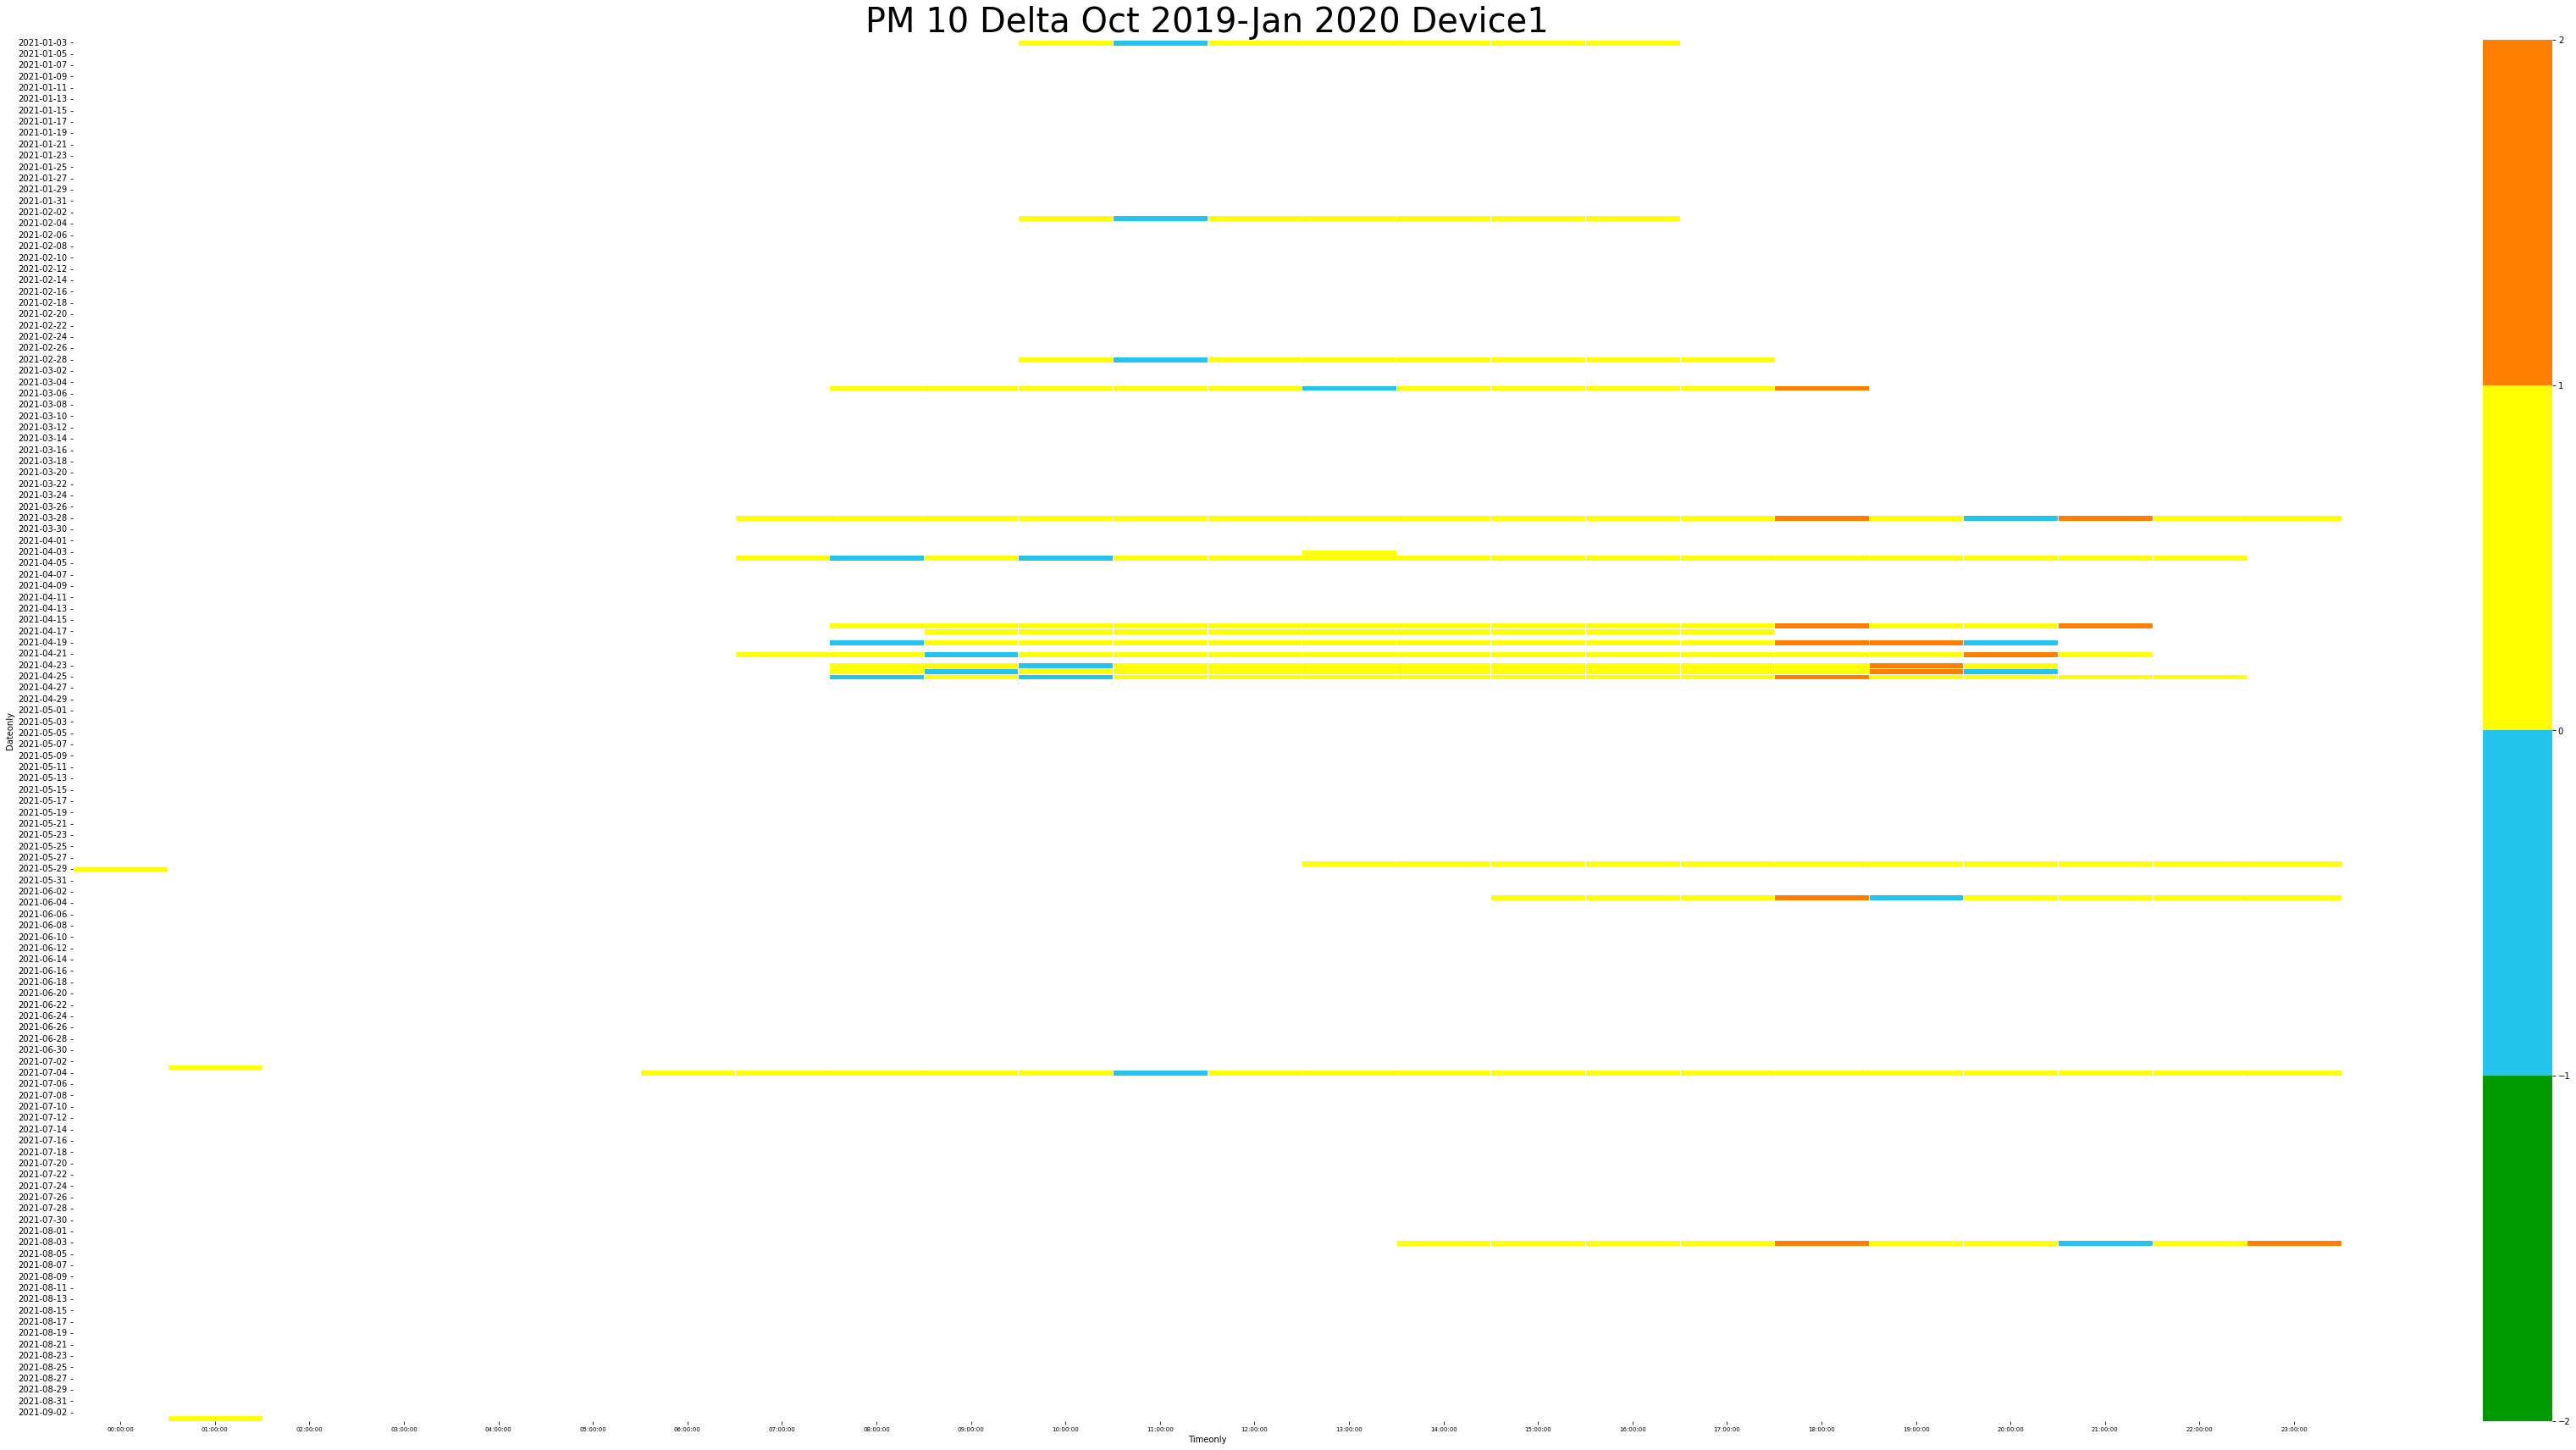

/var/folders/05/_qfw57vs3q11gx3s4bn_128m0000gn/T/ipykernel_41943/2991223388.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification_df['Mean_PM_10'][ (classification_df.Mean_PM_10 <51) ] = 1
/var/folders/05/_qfw57vs3q11gx3s4bn_128m0000gn/T/ipykernel_41943/2991223388.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification_df['Mean_PM_10'][ (classification_df.Mean_PM_10 >=51) & (classification_df.Mean_PM_10 <101)] = 2
/var/folders/05/_qfw57vs3q11gx3s4bn_128m0000gn/T/ipykernel_41943/2991223388.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

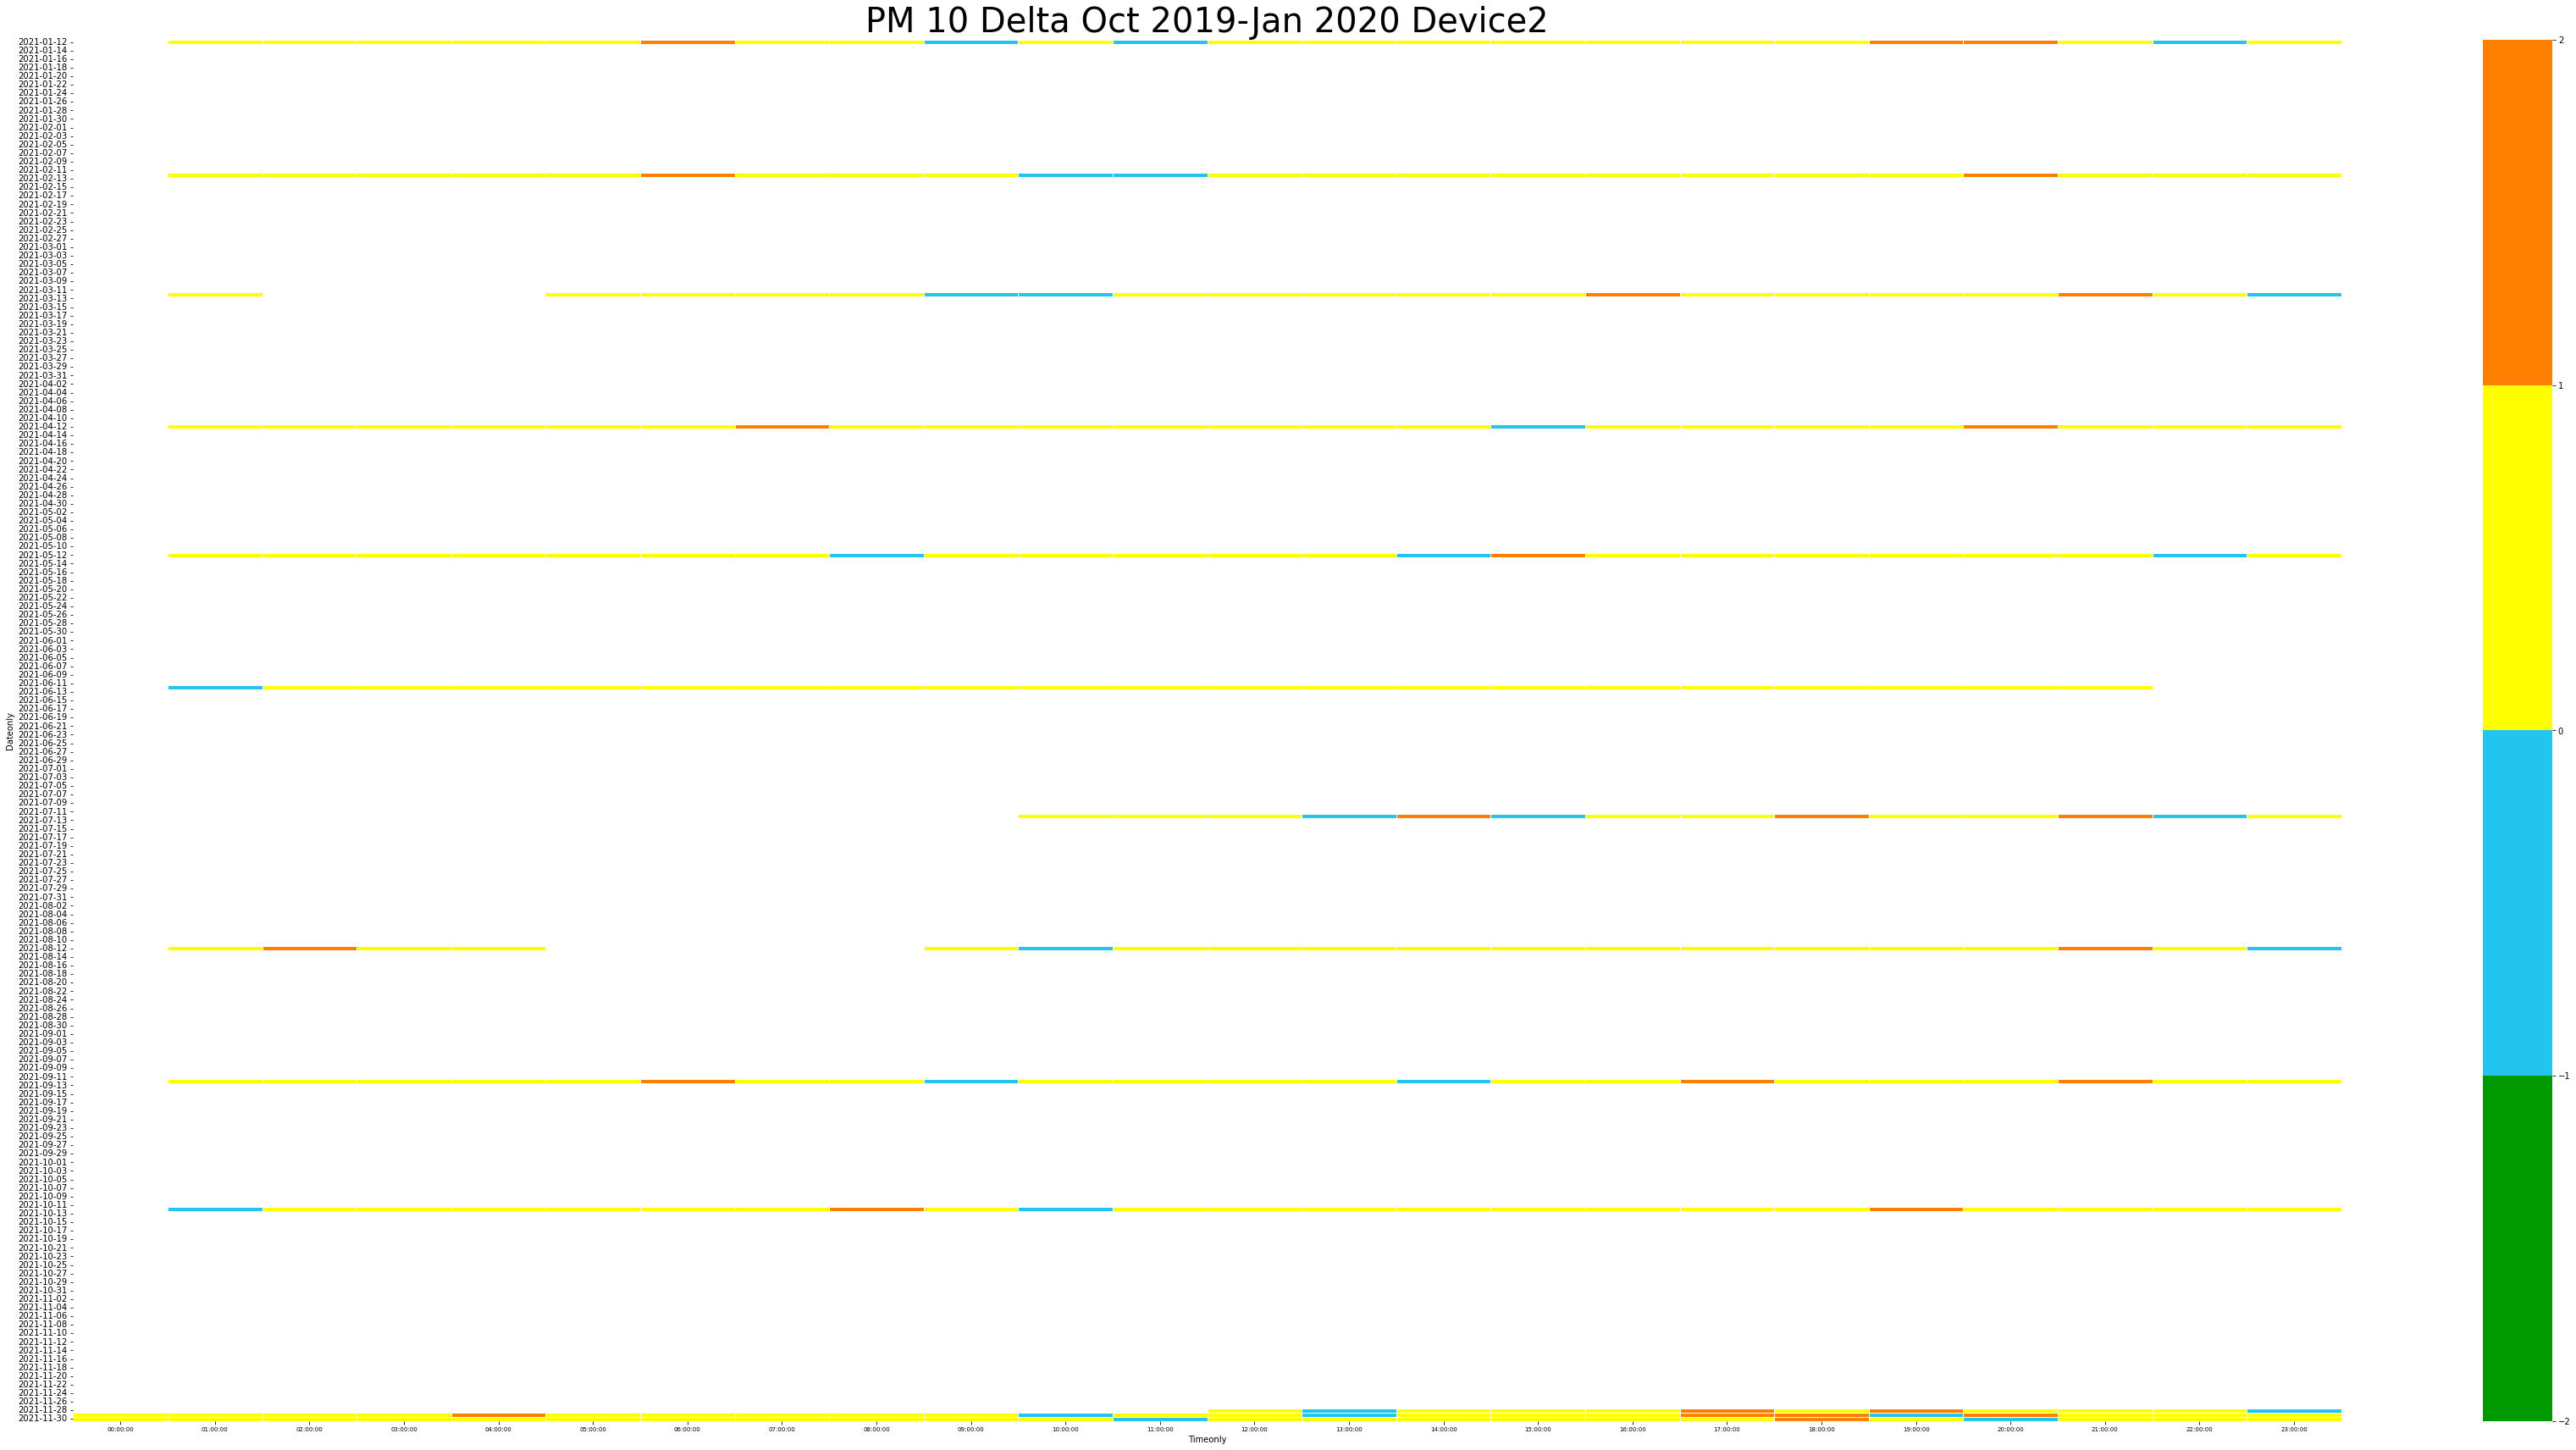

/var/folders/05/_qfw57vs3q11gx3s4bn_128m0000gn/T/ipykernel_41943/2991223388.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification_df['Mean_PM_10'][ (classification_df.Mean_PM_10 <51) ] = 1
/var/folders/05/_qfw57vs3q11gx3s4bn_128m0000gn/T/ipykernel_41943/2991223388.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification_df['Mean_PM_10'][ (classification_df.Mean_PM_10 >=51) & (classification_df.Mean_PM_10 <101)] = 2
/var/folders/05/_qfw57vs3q11gx3s4bn_128m0000gn/T/ipykernel_41943/2991223388.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

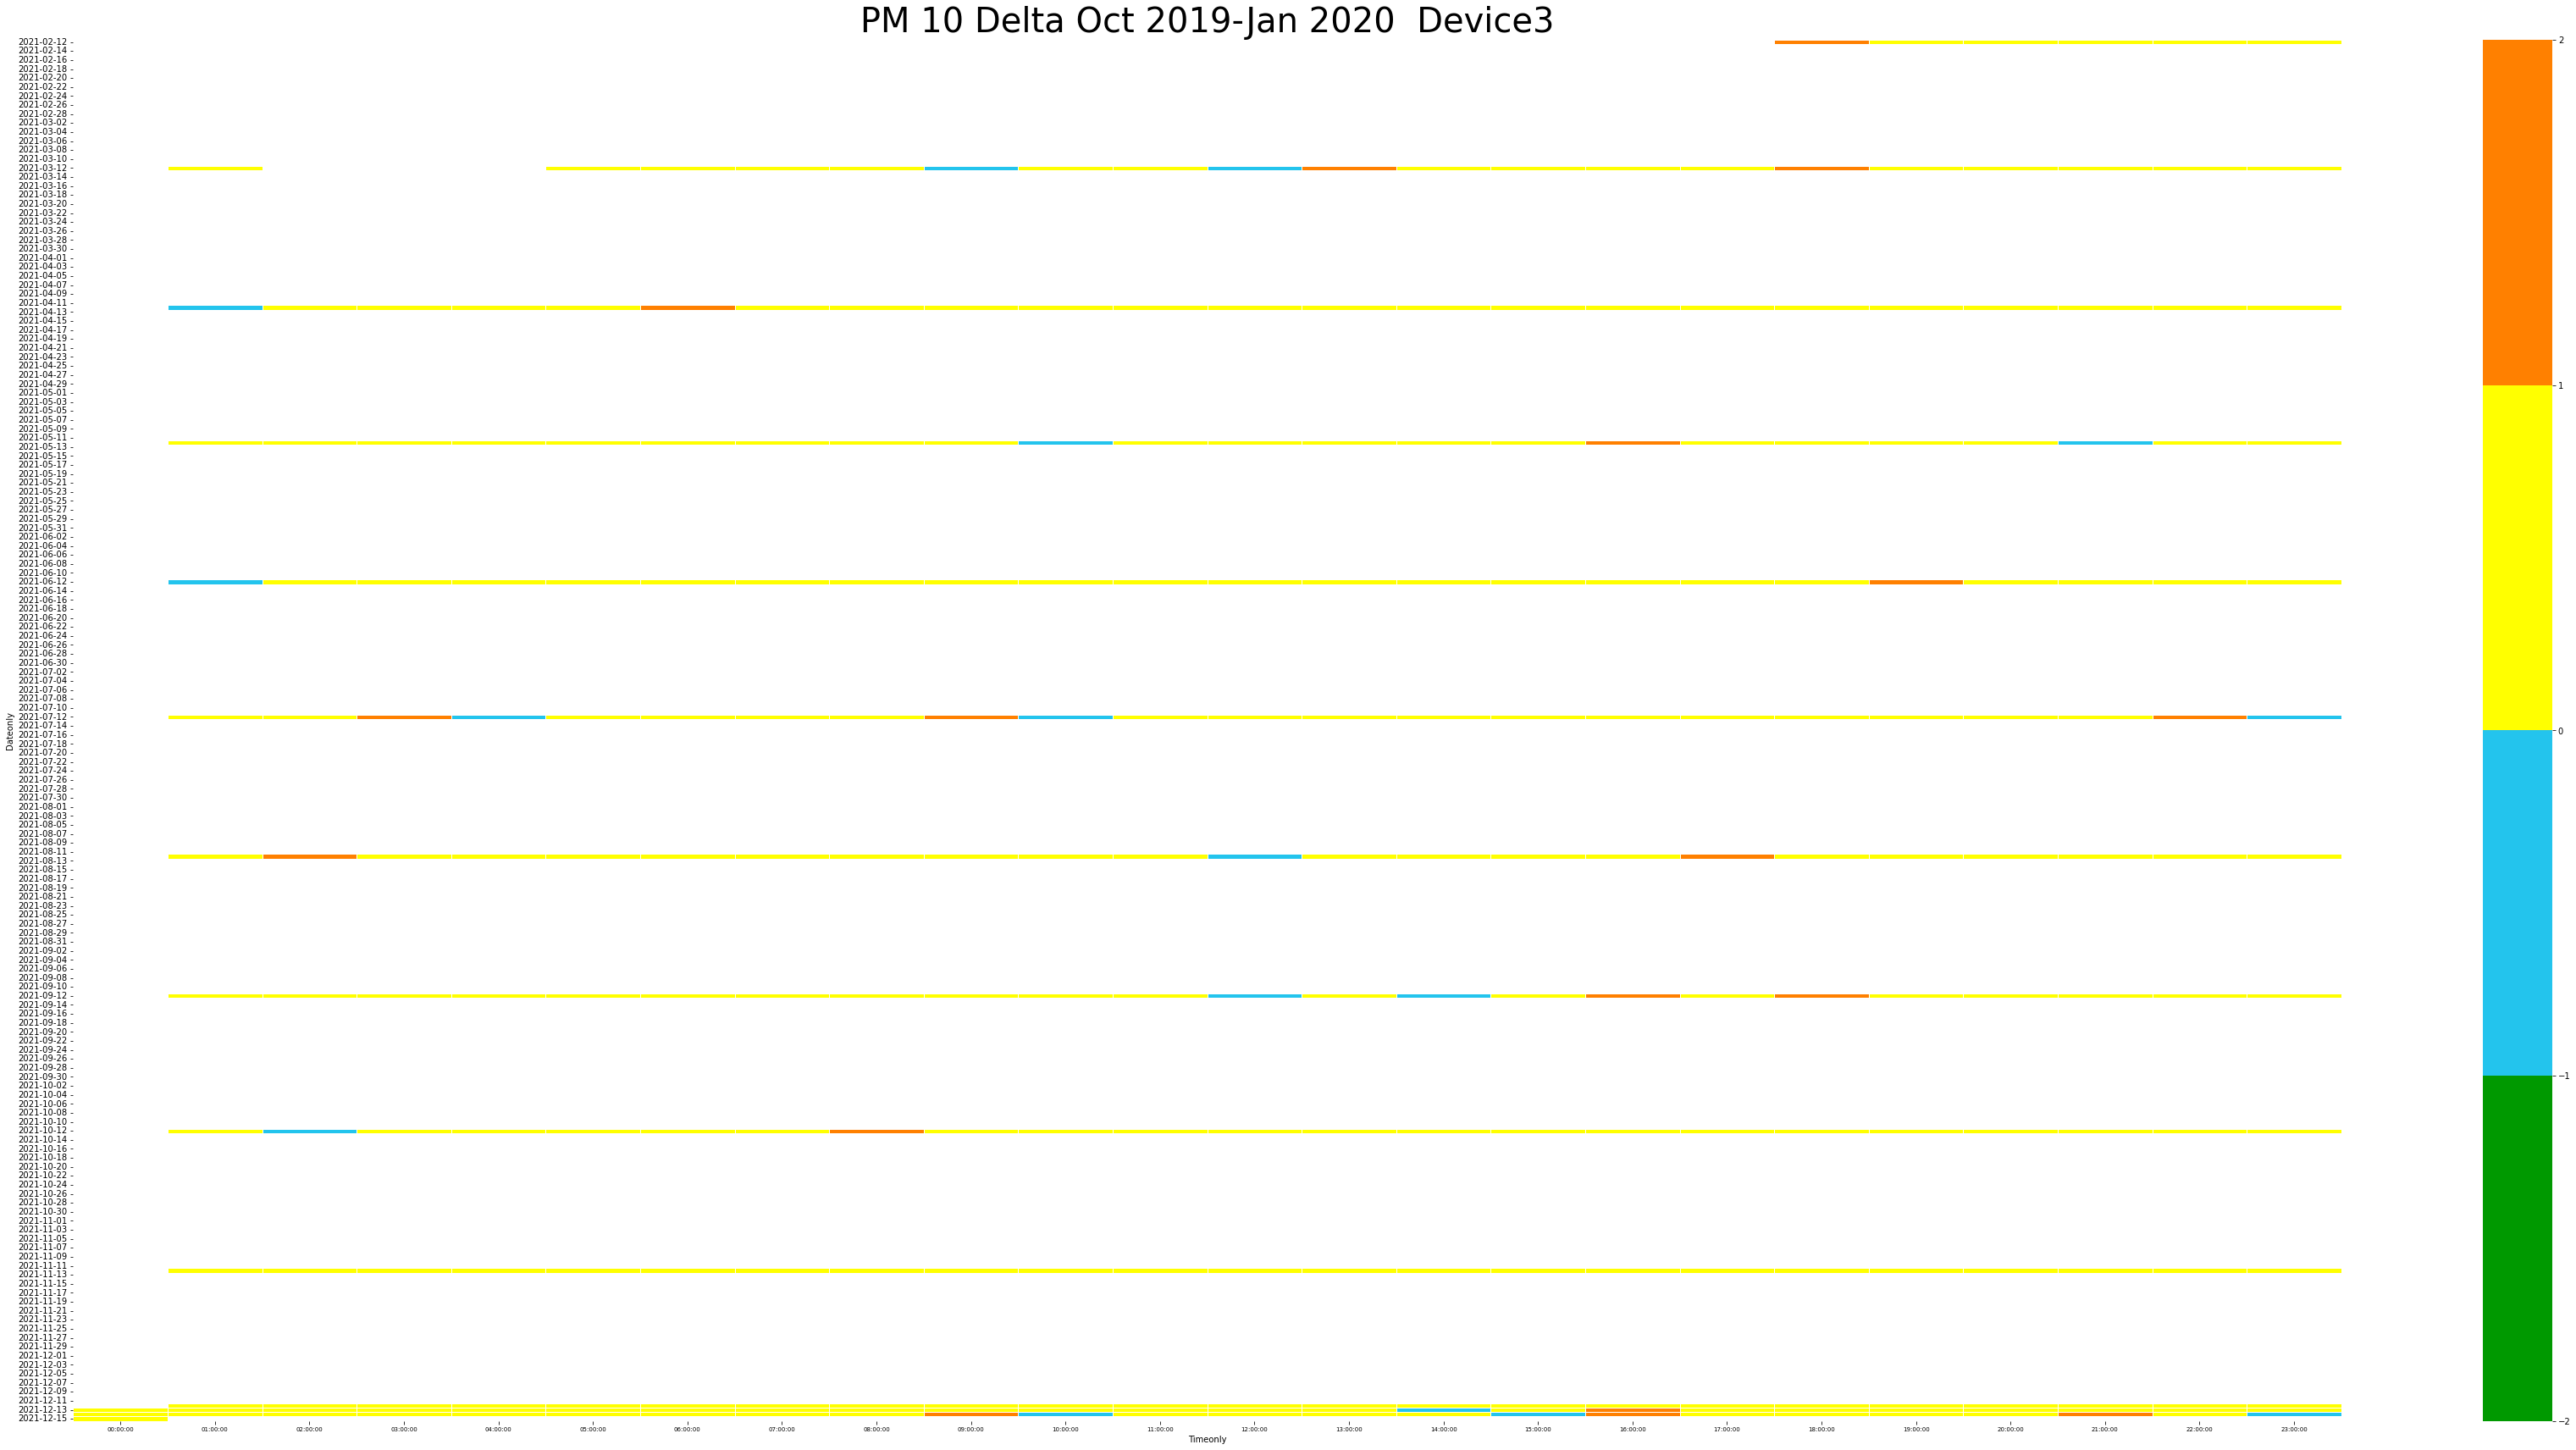

/var/folders/05/_qfw57vs3q11gx3s4bn_128m0000gn/T/ipykernel_41943/2991223388.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification_df['Mean_PM_10'][ (classification_df.Mean_PM_10 <51) ] = 1
/var/folders/05/_qfw57vs3q11gx3s4bn_128m0000gn/T/ipykernel_41943/2991223388.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification_df['Mean_PM_10'][ (classification_df.Mean_PM_10 >=51) & (classification_df.Mean_PM_10 <101)] = 2
/var/folders/05/_qfw57vs3q11gx3s4bn_128m0000gn/T/ipykernel_41943/2991223388.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

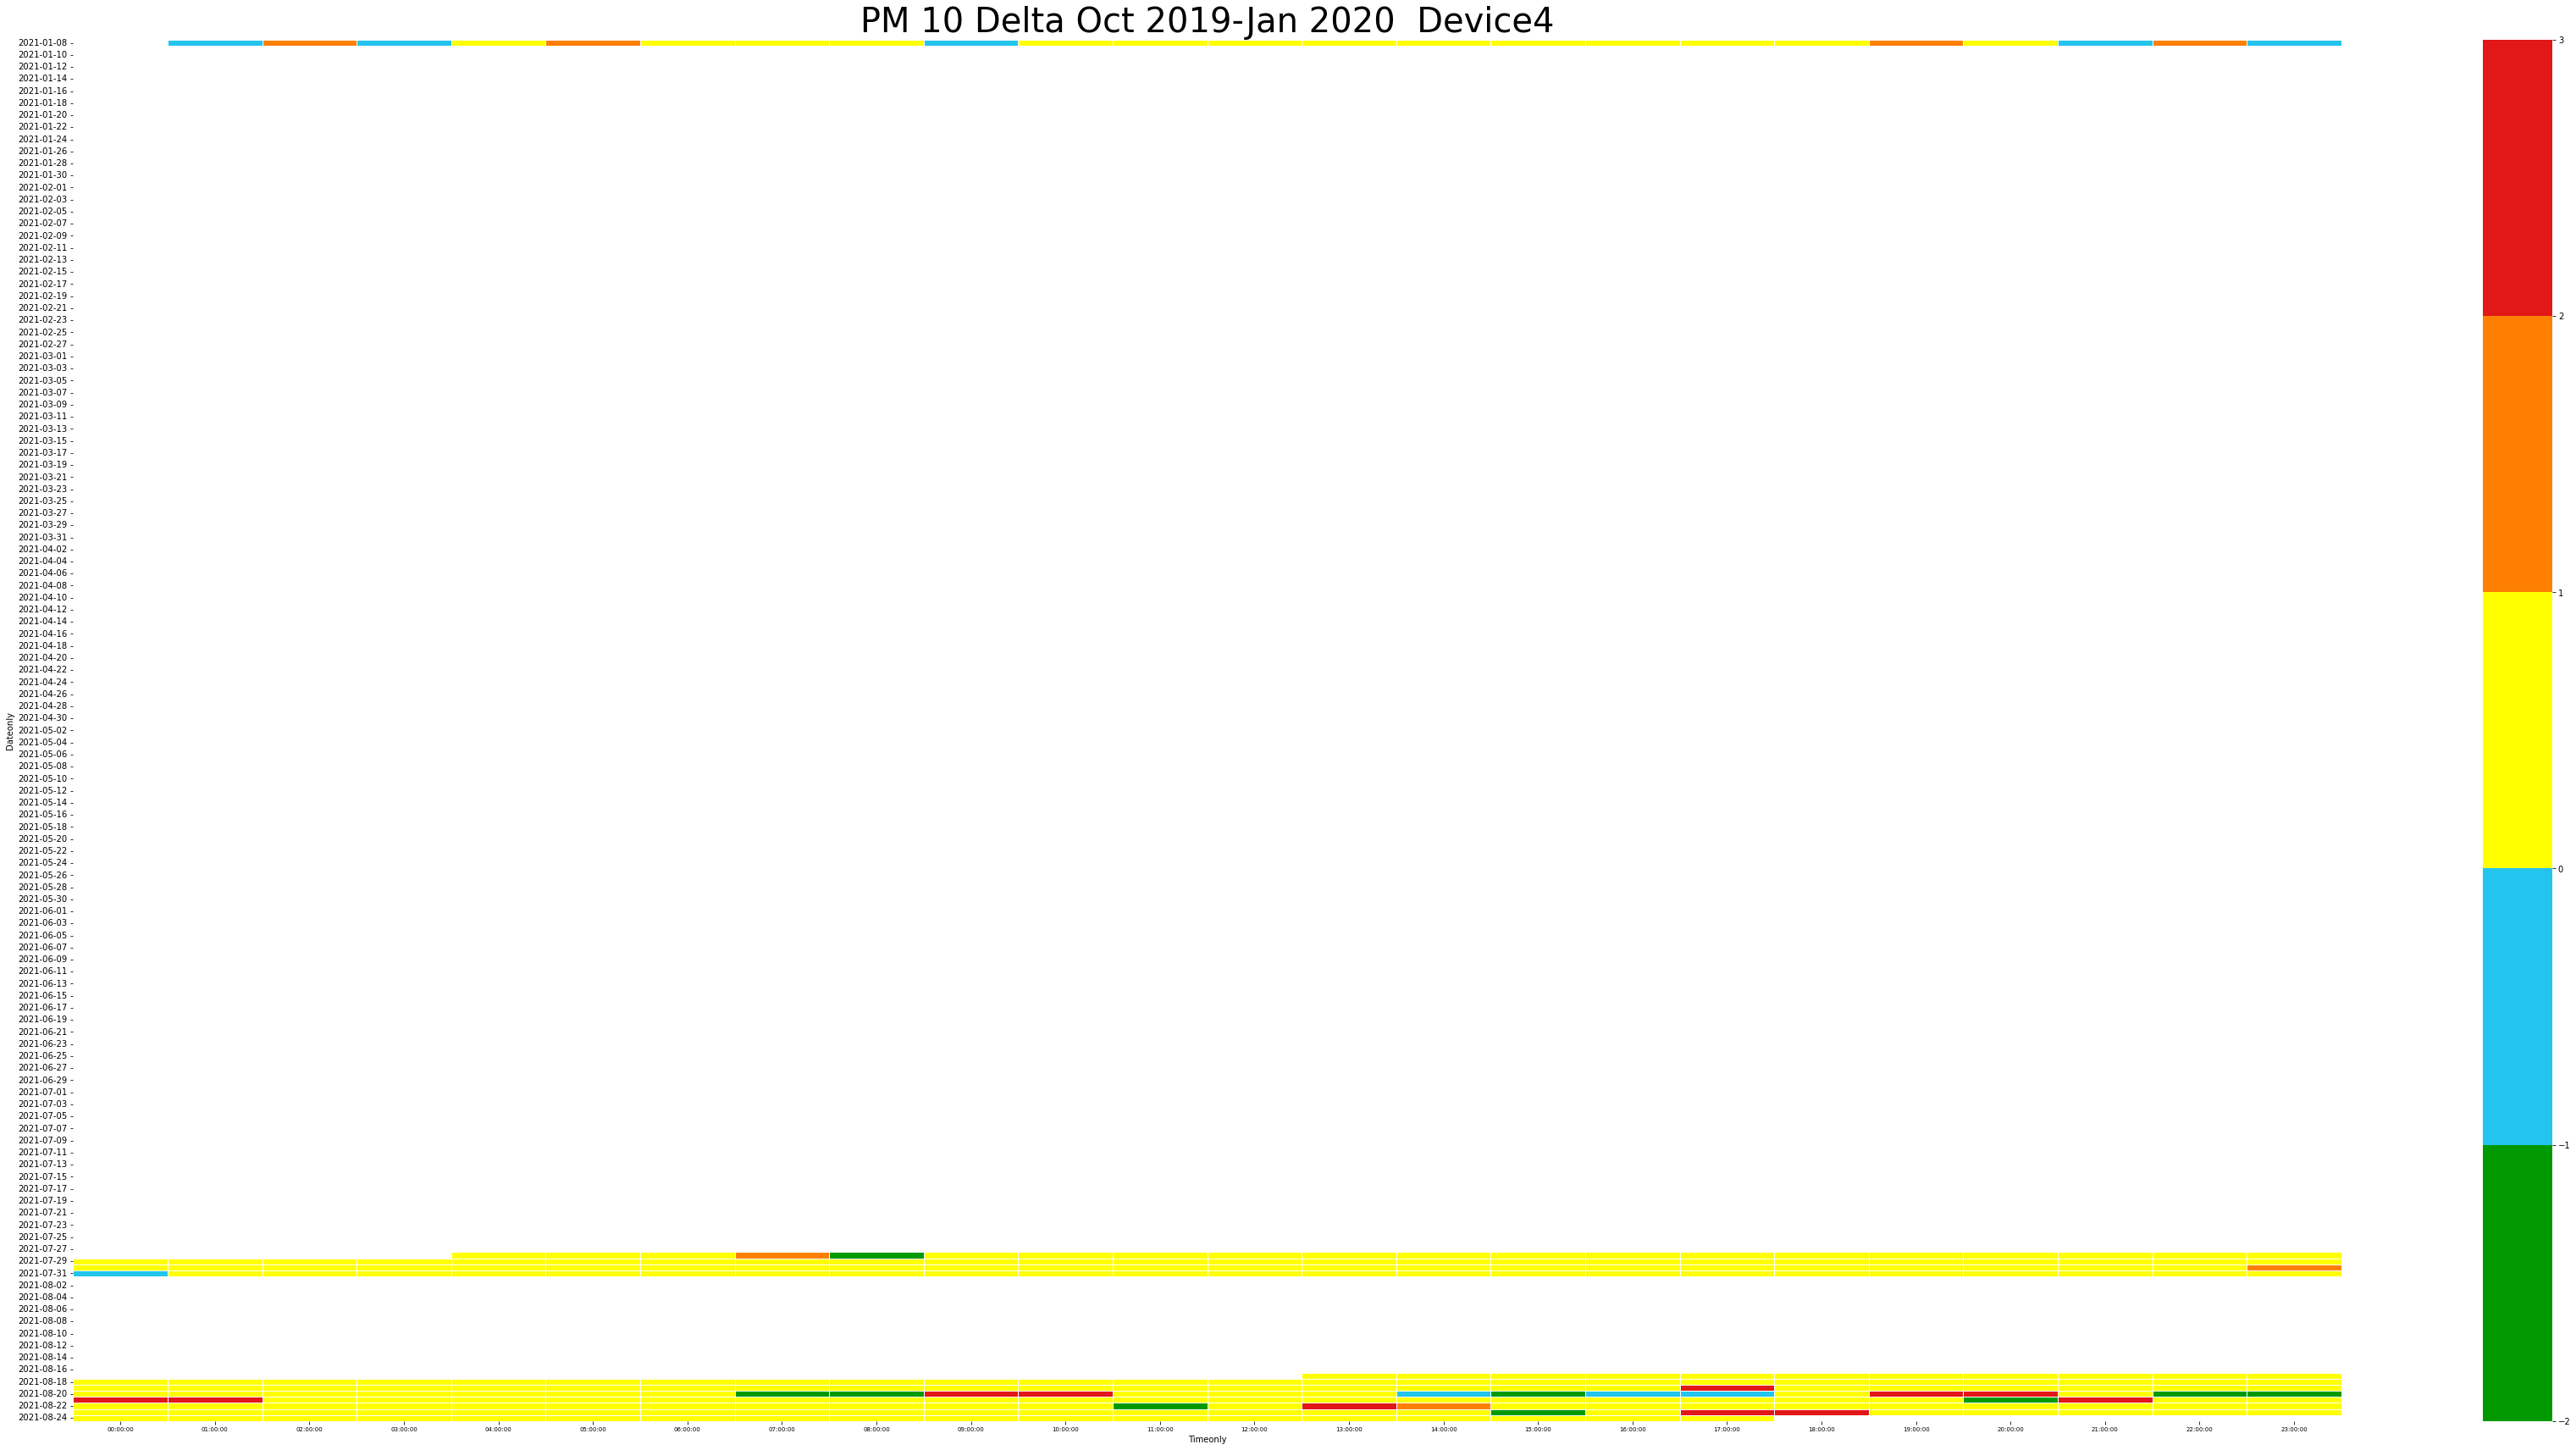

In [92]:
DF2 =pd.read_csv("D-1.csv" )
DF4 =pd.read_csv("D-4.csv" )
DF6 =pd.read_csv("D-6.csv" )
DF7 =pd.read_csv("D-7.csv")


DF2 = processsDf(DF2,'2021-01-01','2021-12-31')
DF4 = processsDf(DF4,'2021-01-01','2021-12-31')
DF6 =processsDf(DF6,'2021-01-01','2021-12-31')
DF7 =processsDf(DF7,'2021-01-01','2021-12-31')



makeHeatmapPM10(DF2,"PM 10 Delta Oct 2019-Jan 2020 Device1")
makeHeatmapPM10(DF4,"PM 10 Delta Oct 2019-Jan 2020 Device2")
makeHeatmapPM10(DF6,"PM 10 Delta Oct 2019-Jan 2020  Device3")
makeHeatmapPM10(DF7,"PM 10 Delta Oct 2019-Jan 2020  Device4")







/var/folders/05/_qfw57vs3q11gx3s4bn_128m0000gn/T/ipykernel_41943/2991223388.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification_df['Mean_PM_25'][ (classification_df.Mean_PM_25 <31) ] = 1
/var/folders/05/_qfw57vs3q11gx3s4bn_128m0000gn/T/ipykernel_41943/2991223388.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification_df['Mean_PM_25'][ (classification_df.Mean_PM_25 >=31) & (classification_df.Mean_PM_25 <61)] = 2
/var/folders/05/_qfw57vs3q11gx3s4bn_128m0000gn/T/ipykernel_41943/2991223388.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the 

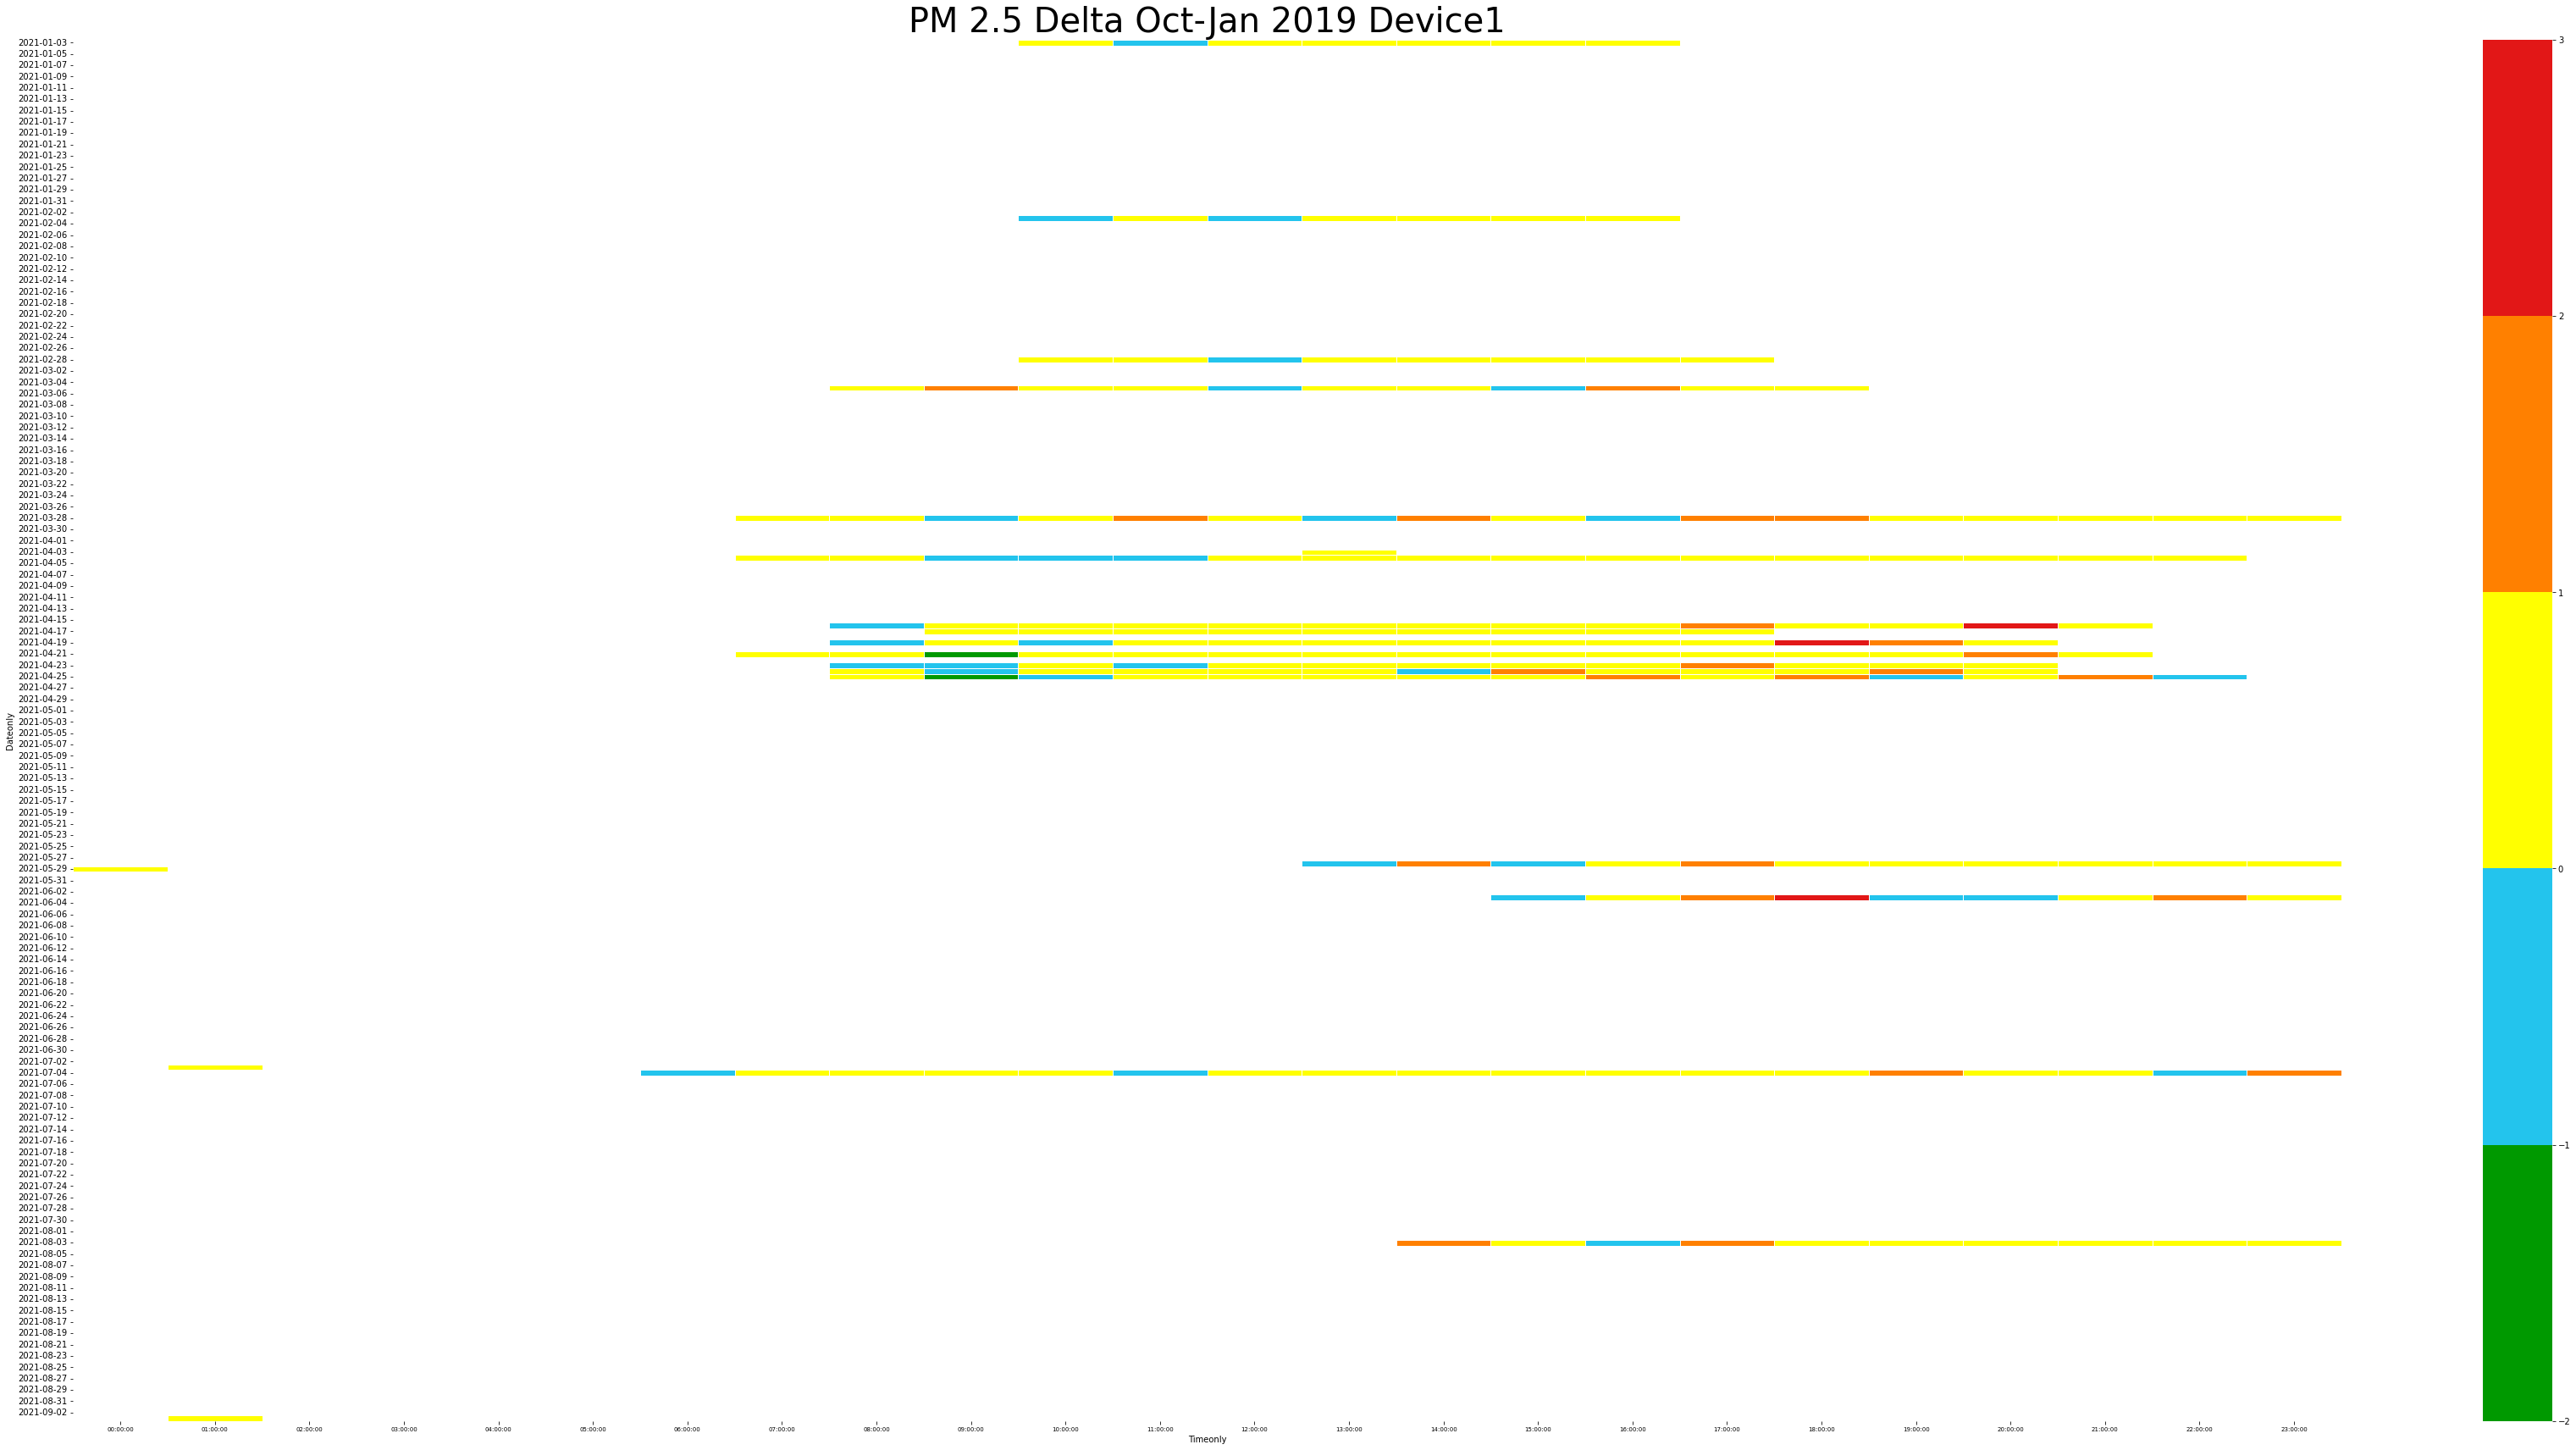

/var/folders/05/_qfw57vs3q11gx3s4bn_128m0000gn/T/ipykernel_41943/2991223388.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification_df['Mean_PM_25'][ (classification_df.Mean_PM_25 <31) ] = 1
/var/folders/05/_qfw57vs3q11gx3s4bn_128m0000gn/T/ipykernel_41943/2991223388.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification_df['Mean_PM_25'][ (classification_df.Mean_PM_25 >=31) & (classification_df.Mean_PM_25 <61)] = 2
/var/folders/05/_qfw57vs3q11gx3s4bn_128m0000gn/T/ipykernel_41943/2991223388.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the 

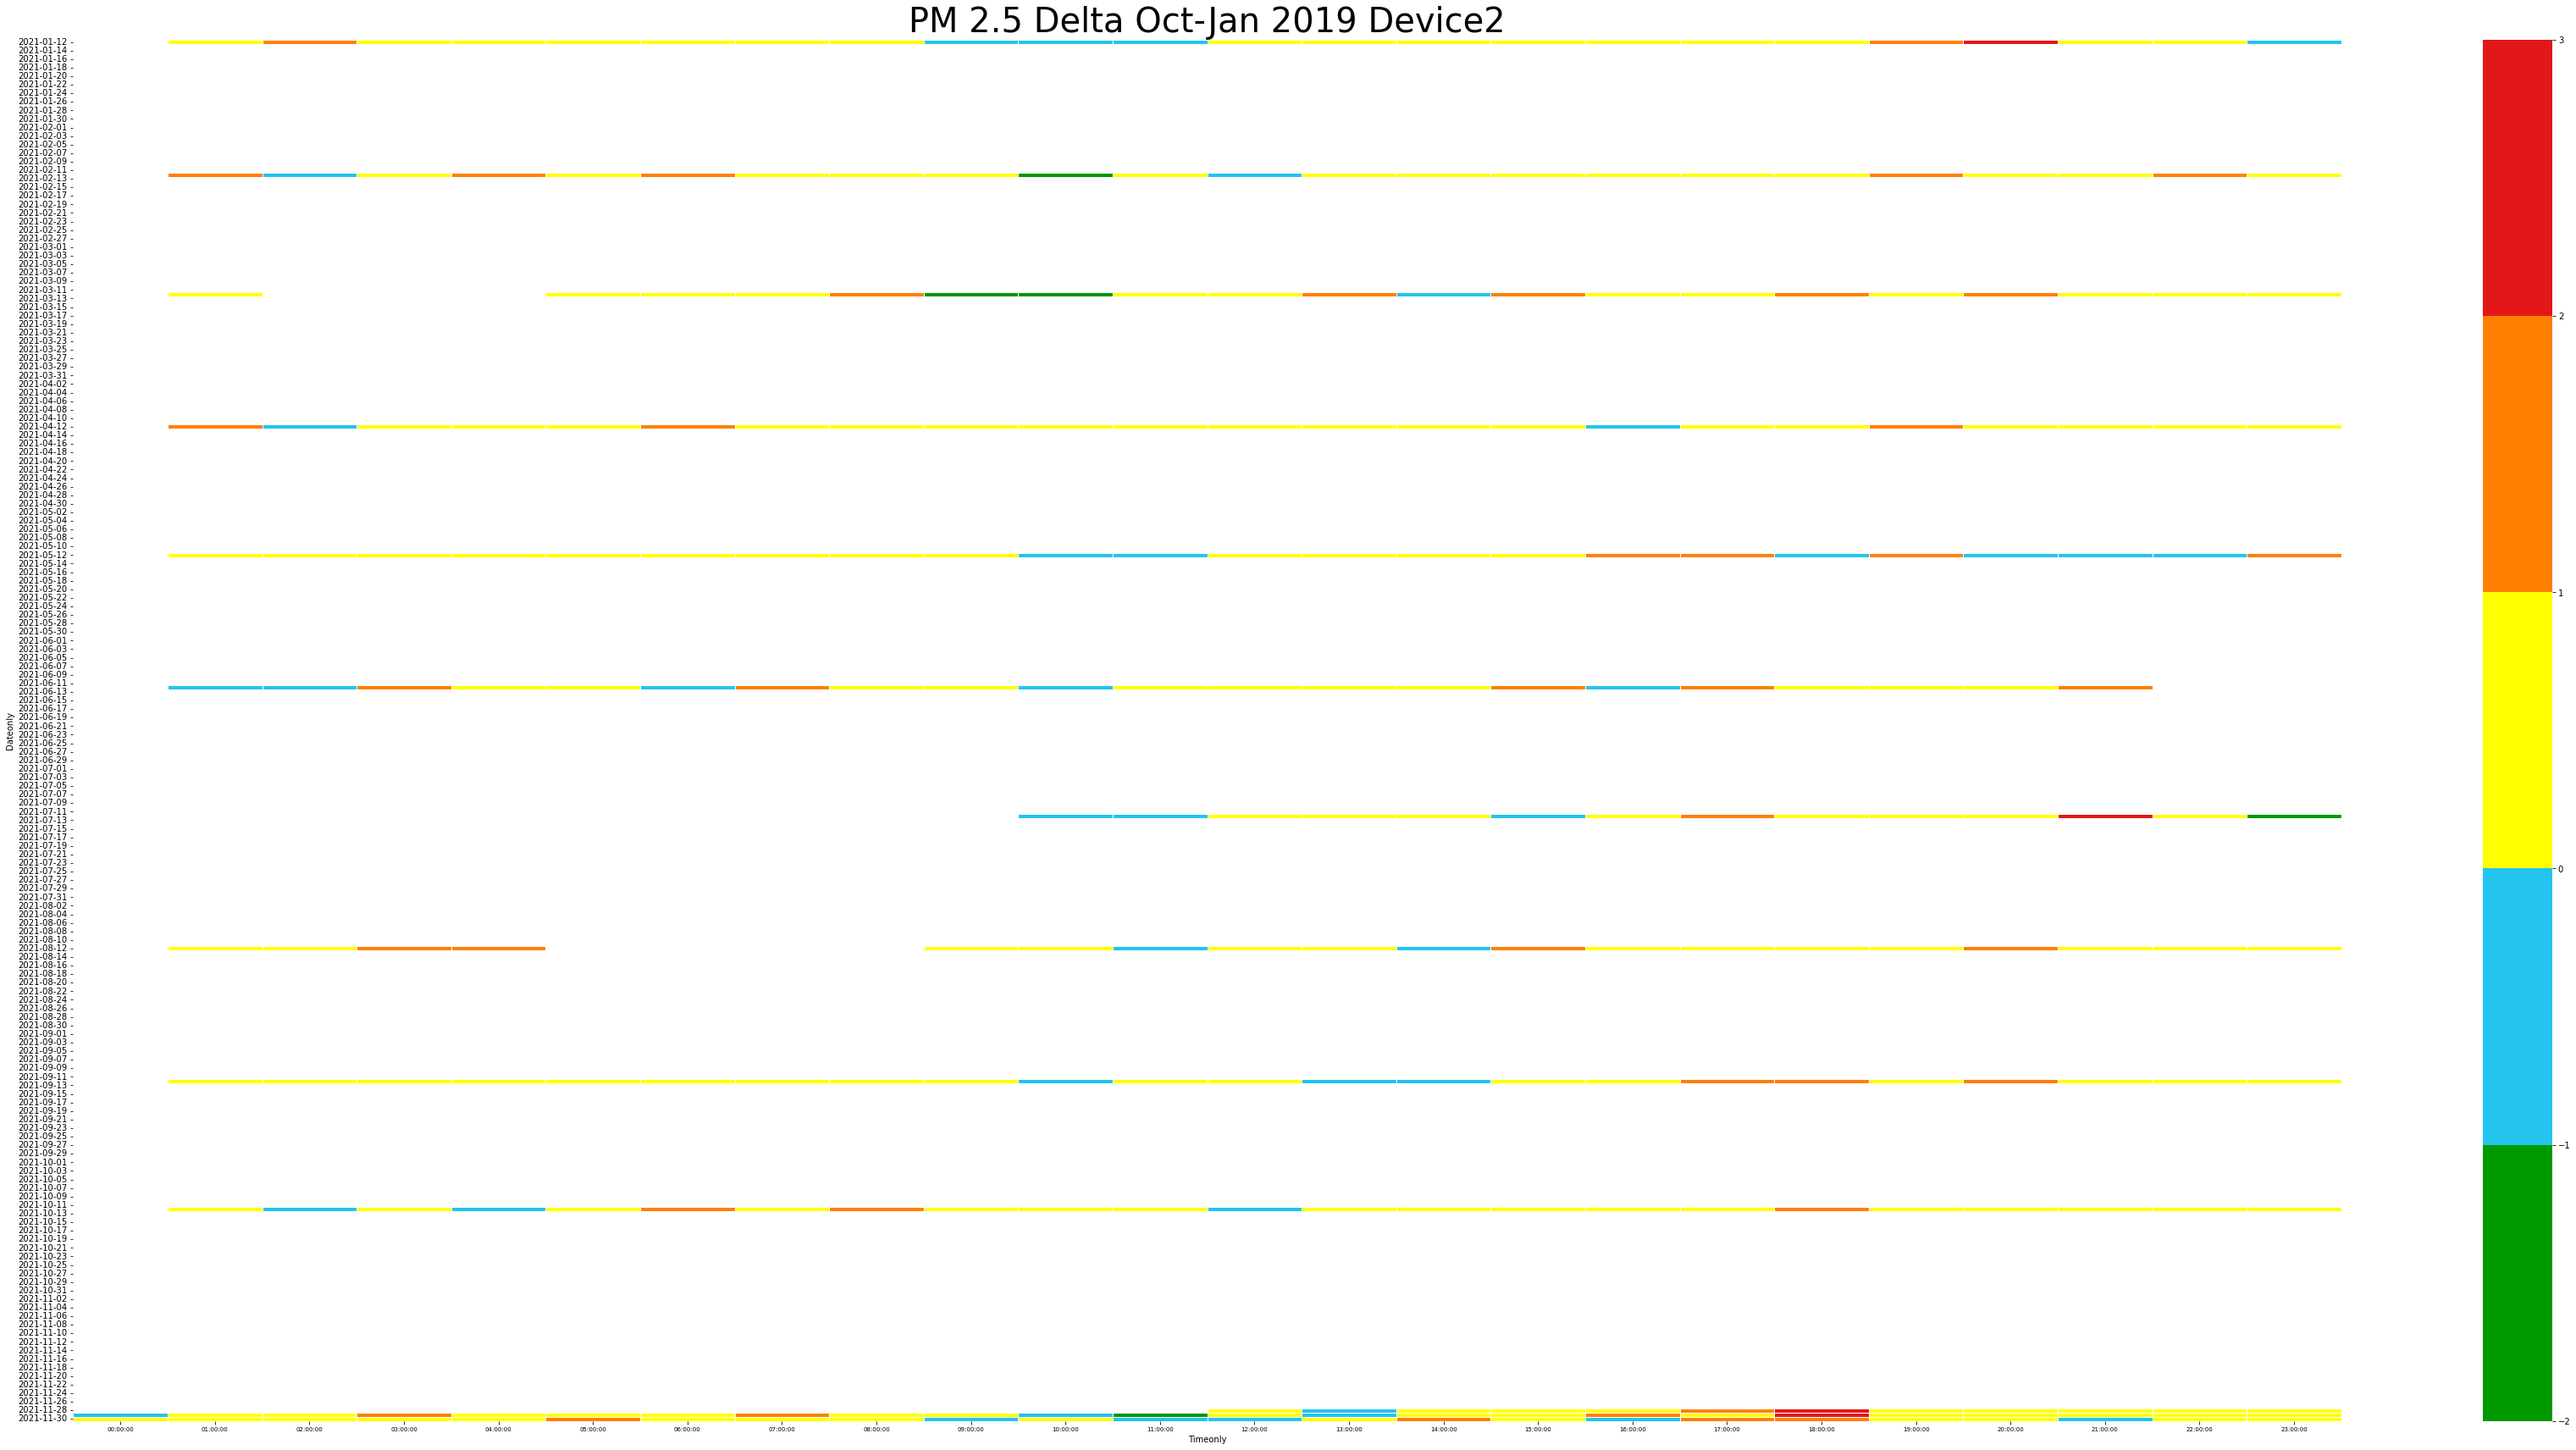

/var/folders/05/_qfw57vs3q11gx3s4bn_128m0000gn/T/ipykernel_41943/2991223388.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification_df['Mean_PM_25'][ (classification_df.Mean_PM_25 <31) ] = 1
/var/folders/05/_qfw57vs3q11gx3s4bn_128m0000gn/T/ipykernel_41943/2991223388.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification_df['Mean_PM_25'][ (classification_df.Mean_PM_25 >=31) & (classification_df.Mean_PM_25 <61)] = 2
/var/folders/05/_qfw57vs3q11gx3s4bn_128m0000gn/T/ipykernel_41943/2991223388.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the 

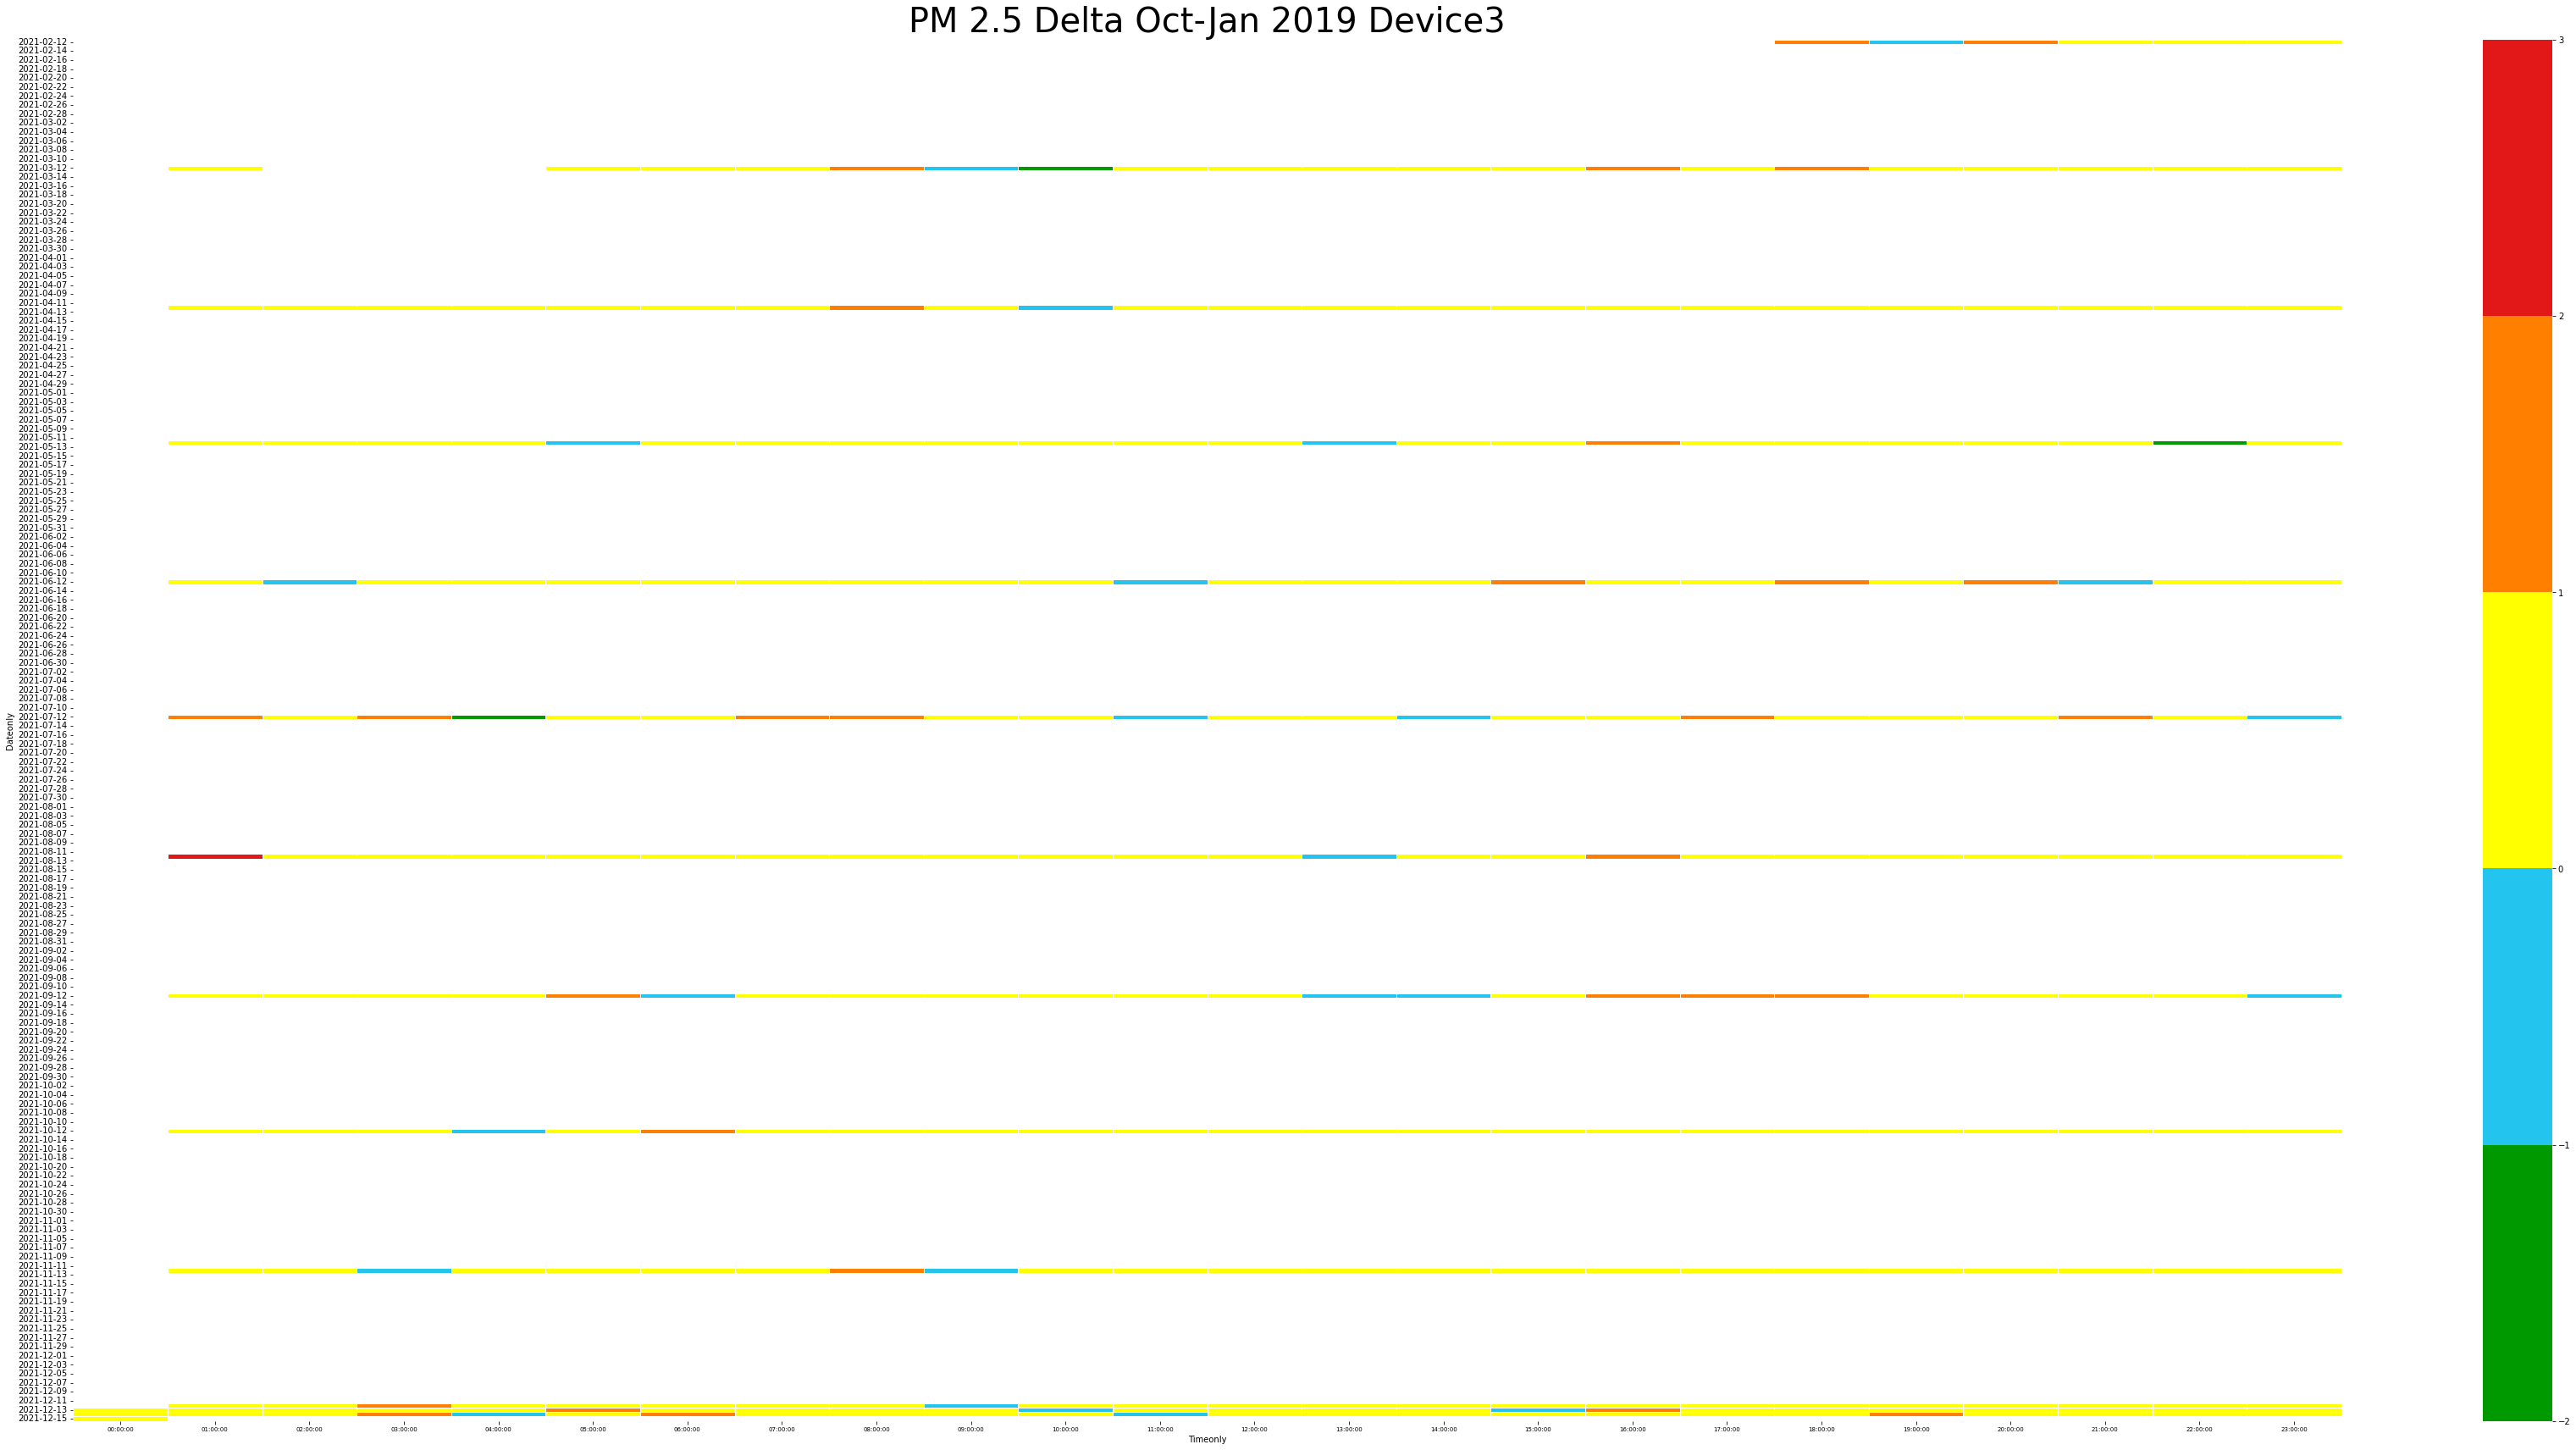

/var/folders/05/_qfw57vs3q11gx3s4bn_128m0000gn/T/ipykernel_41943/2991223388.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification_df['Mean_PM_25'][ (classification_df.Mean_PM_25 <31) ] = 1
/var/folders/05/_qfw57vs3q11gx3s4bn_128m0000gn/T/ipykernel_41943/2991223388.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification_df['Mean_PM_25'][ (classification_df.Mean_PM_25 >=31) & (classification_df.Mean_PM_25 <61)] = 2
/var/folders/05/_qfw57vs3q11gx3s4bn_128m0000gn/T/ipykernel_41943/2991223388.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the 

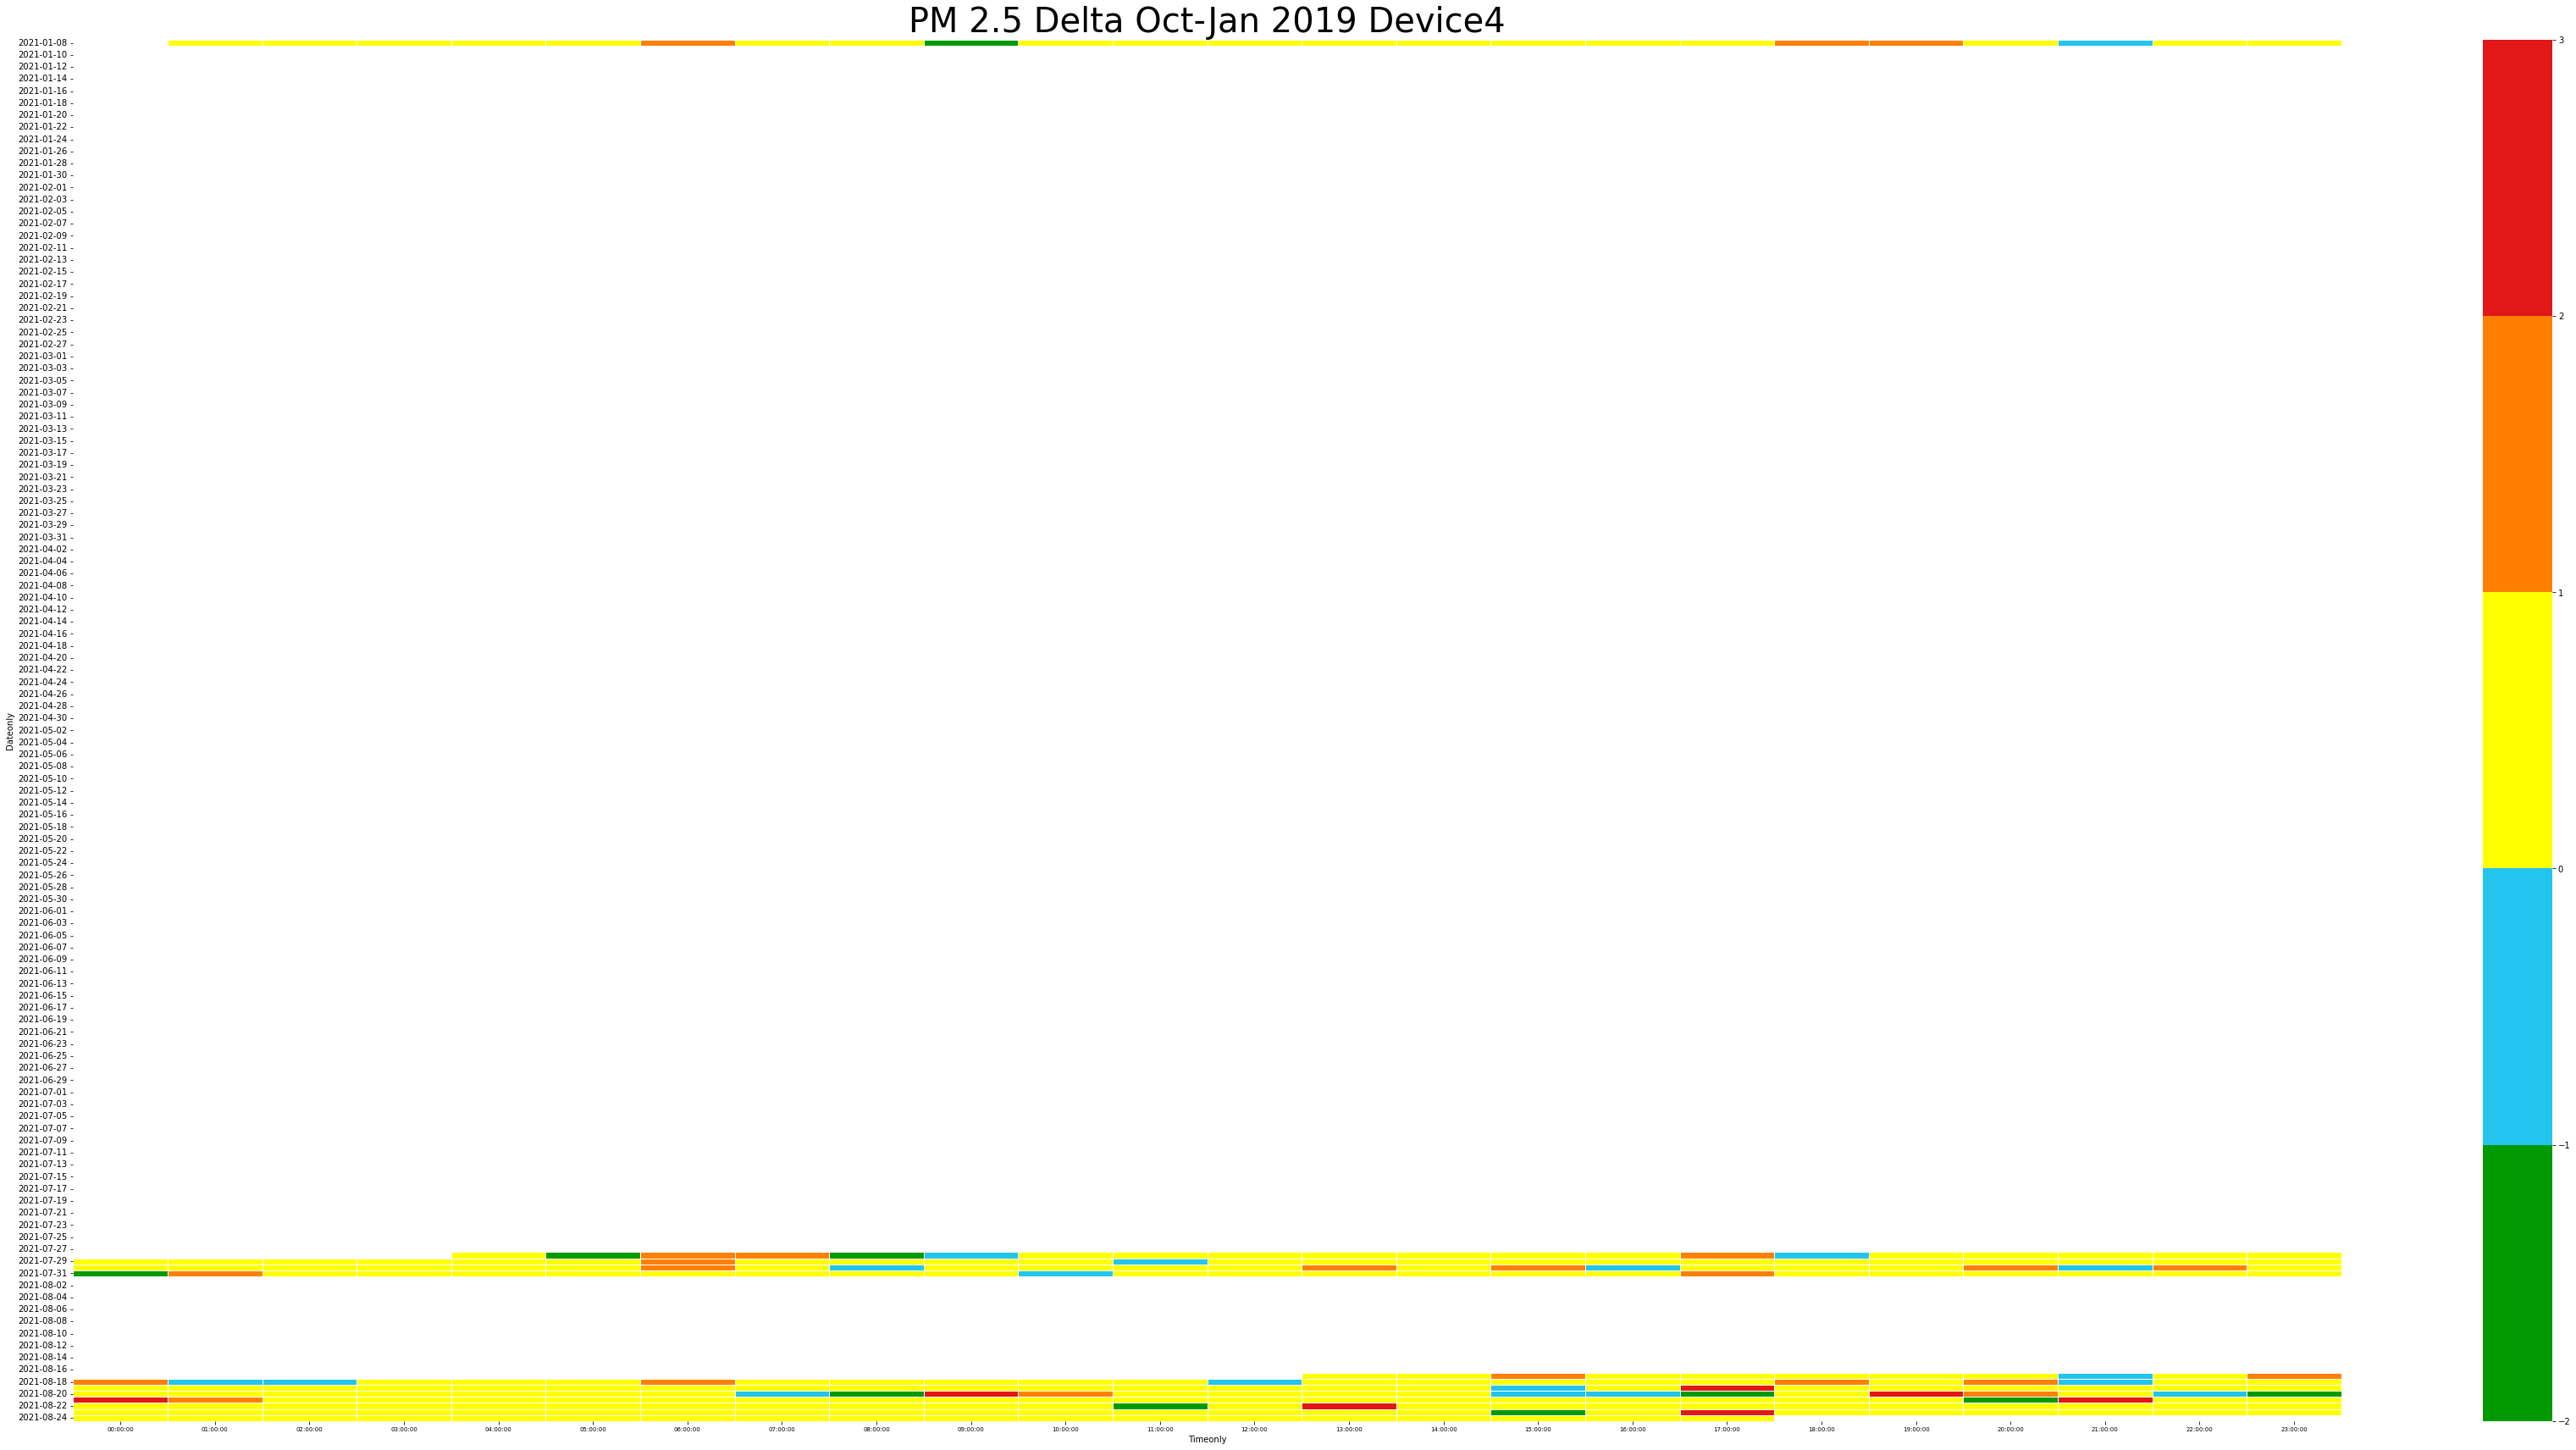

In [93]:
makeHeatmapPM25(DF2,"PM 2.5 Delta Oct-Jan 2019 Device1")
makeHeatmapPM25(DF4,"PM 2.5 Delta Oct-Jan 2019 Device2")
makeHeatmapPM25(DF6,"PM 2.5 Delta Oct-Jan 2019 Device3")
makeHeatmapPM25(DF7,"PM 2.5 Delta Oct-Jan 2019 Device4")

# DF to CSV

In [94]:
DF2.loc[DF2['PM_25_DIFF']==2]


,Temperature,Humidity,Carbon Monoxide,Nitrogen Dioxide,Mean_PM_25,Mean_PM_10,Dateonly,Timeonly,CO,NO2,type,PM_10_DIFF,PM_25_DIFF
Date,,,,,,,,,,,,,
2021-04-16 20:00:00,25.000000,59.181818,22.636364,1.209091,5.0,2.0,2021-04-16,20:00:00,22.636364,1.209091,0,0.0,2.0
2021-04-19 18:00:00,29.909091,21.363636,22.181818,0.966364,4.0,2.0,2021-04-19,18:00:00,22.181818,0.966364,0,1.0,2.0
2021-06-03 18:00:00,29.181818,21.454545,24.000000,0.860000,4.0,2.0,2021-06-03,18:00:00,24.000000,0.860000,0,1.0,2.0


In [95]:
DF2_FILTERED = DF2[ (abs(DF2['PM_25_DIFF']) == 2 )| (abs(DF2['PM_10_DIFF']) == 2) ]
DF4_FILTERED = DF4[ (abs(DF4['PM_25_DIFF']) == 2 )| (abs(DF4['PM_10_DIFF']) == 2) ]
DF6_FILTERED = DF6[ (abs(DF6['PM_25_DIFF']) == 2 )| (abs(DF6['PM_10_DIFF']) == 2) ]
DF7_FILTERED = DF7[ (abs(DF7['PM_25_DIFF']) == 2 )| (abs(DF7['PM_10_DIFF']) == 2) ]

DF2['type'][ (DF2.PM_25_DIFF == -2) | (DF2.PM_10_DIFF == -2)] = 1
DF2['type'][ (DF2.PM_25_DIFF == 2) | (DF2.PM_10_DIFF == 2)] = 1

DF4['type'][ (DF4.PM_25_DIFF == -2) | (DF4.PM_10_DIFF == -2)] = 1
DF4['type'][ (DF4.PM_25_DIFF == 2) | (DF4.PM_10_DIFF == 2)] = 1

DF6['type'][ (DF6.PM_25_DIFF == -2) | (DF6.PM_10_DIFF == -2)] = 1
DF6['type'][ (DF6.PM_25_DIFF == 2) | (DF6.PM_10_DIFF == 2)] = 1

DF7['type'][ (DF7.PM_25_DIFF == -2) | (DF7.PM_10_DIFF == -2)] = 1
DF7['type'][ (DF7.PM_25_DIFF == 2) | (DF7.PM_10_DIFF == 2)] = 1






/var/folders/05/_qfw57vs3q11gx3s4bn_128m0000gn/T/ipykernel_41943/2613009518.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF2['type'][ (DF2.PM_25_DIFF == -2) | (DF2.PM_10_DIFF == -2)] = 1
/var/folders/05/_qfw57vs3q11gx3s4bn_128m0000gn/T/ipykernel_41943/2613009518.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF2['type'][ (DF2.PM_25_DIFF == 2) | (DF2.PM_10_DIFF == 2)] = 1
/var/folders/05/_qfw57vs3q11gx3s4bn_128m0000gn/T/ipykernel_41943/2613009518.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

# Finding overlapping events

In [96]:
DF4_FILTERED

,Temperature,Humidity,Carbon Monoxide,Nitrogen Dioxide,Mean_PM_25,Mean_PM_10,Dateonly,Timeonly,CO,NO2,type,PM_10_DIFF,PM_25_DIFF
Date,,,,,,,,,,,,,
2021-01-12 20:00:00,22.000000,73.300000,0.0,0.964000,5.0,3.0,2021-01-12,20:00:00,0.0,0.964000,0,1.0,2.0
2021-02-12 10:00:00,25.200000,58.000000,0.0,0.950000,3.0,2.0,2021-02-12,10:00:00,0.0,0.950000,0,-1.0,-2.0
2021-03-12 09:00:00,23.636364,69.090909,0.0,0.920909,4.0,2.0,2021-03-12,09:00:00,0.0,0.920909,0,-1.0,-2.0
2021-03-12 10:00:00,25.454545,60.909091,0.0,0.927273,2.0,1.0,2021-03-12,10:00:00,0.0,0.927273,0,-1.0,-2.0
2021-07-12 21:00:00,20.900000,95.500000,0.0,1.056000,5.0,3.0,2021-07-12,21:00:00,0.0,1.056000,0,1.0,2.0
2021-07-12 23:00:00,20.090909,97.909091,0.0,1.032727,3.0,2.0,2021-07-12,23:00:00,0.0,1.032727,0,0.0,-2.0
2021-11-28 18:00:00,22.636364,72.363636,0.0,0.990000,5.0,2.0,2021-11-28,18:00:00,0.0,0.990000,0,0.0,2.0
2021-11-29 11:00:00,26.545455,53.909091,0.0,0.977273,3.0,2.0,2021-11-29,11:00:00,0.0,0.977273,0,0.0,-2.0
2021-11-29 18:00:00,23.000000,68.636364,0.0,0.983636,5.0,3.0,2021-11-29,18:00:00,0.0,0.983636,0,1.0,2.0


In [97]:
MERGED_DF1 = pd.merge(DF6_FILTERED, DF2_FILTERED, how ='inner', on =['Dateonly'])
MERGED_DF2 = pd.merge(DF6_FILTERED, DF7_FILTERED, how ='inner', on =['Dateonly'])
MERGED_DF3 = pd.merge(DF4_FILTERED, DF7_FILTERED, how ='inner', on =['Dateonly'])
#UNION_DF1 = pd.merge(MERGED_DF1, MERGED_DF2, how ='inner', on =['Dateonly'])
#UNION_DF2 = pd.merge(UNION_DF1, MERGED_DF3, how ='inner', on =['Dateonly'])

#UNION_DF1 = pd.concat([MERGED_DF1,MERGED_DF2])
UNION_DF2 = pd.concat([MERGED_DF1,MERGED_DF2,MERGED_DF3])



In [98]:
UNION_DF2 = UNION_DF2.sort_values('Dateonly')
UNION_DF=UNION_DF2.drop_duplicates(subset=['Dateonly'], keep='first')

print(UNION_DF.shape)
UNION_DF


(0, 25)


,Temperature_x,Humidity_x,Carbon Monoxide_x,Nitrogen Dioxide_x,Mean_PM_25_x,Mean_PM_10_x,Dateonly,Timeonly_x,CO_x,NO2_x,...,Carbon Monoxide_y,Nitrogen Dioxide_y,Mean_PM_25_y,Mean_PM_10_y,Timeonly_y,CO_y,NO2_y,type_y,PM_10_DIFF_y,PM_25_DIFF_y


In [99]:
UNION_DF3 = pd.concat([DF2_FILTERED,DF4_FILTERED,DF6_FILTERED,DF7_FILTERED])
UNION_DF3 = UNION_DF3.sort_values('Dateonly')
UNION_DF=UNION_DF3.drop_duplicates(subset=['Dateonly'], keep='first')

print(UNION_DF.shape)
UNION_DF3

(21, 13)


,Temperature,Humidity,Carbon Monoxide,Nitrogen Dioxide,Mean_PM_25,Mean_PM_10,Dateonly,Timeonly,CO,NO2,type,PM_10_DIFF,PM_25_DIFF
Date,,,,,,,,,,,,,
2021-01-08 09:00:00,29.600000,69.000000,12.000000,1.459000,2.0,1.0,2021-01-08,09:00:00,12.000000,1.459000,0,-1.0,-2.0
2021-01-12 20:00:00,22.000000,73.300000,0.000000,0.964000,5.0,3.0,2021-01-12,20:00:00,0.000000,0.964000,0,1.0,2.0
2021-02-12 10:00:00,25.200000,58.000000,0.000000,0.950000,3.0,2.0,2021-02-12,10:00:00,0.000000,0.950000,0,-1.0,-2.0
2021-03-12 09:00:00,23.636364,69.090909,0.000000,0.920909,4.0,2.0,2021-03-12,09:00:00,0.000000,0.920909,0,-1.0,-2.0
2021-03-12 10:00:00,25.454545,60.909091,0.000000,0.927273,2.0,1.0,2021-03-12,10:00:00,0.000000,0.927273,0,-1.0,-2.0
2021-03-12 10:00:00,19.300000,57.000000,3.100000,1.536000,3.0,2.0,2021-03-12,10:00:00,3.100000,1.536000,0,0.0,-2.0
2021-04-16 20:00:00,25.000000,59.181818,22.636364,1.209091,5.0,2.0,2021-04-16,20:00:00,22.636364,1.209091,0,0.0,2.0
2021-04-19 18:00:00,29.909091,21.363636,22.181818,0.966364,4.0,2.0,2021-04-19,18:00:00,22.181818,0.966364,0,1.0,2.0
2021-04-21 09:00:00,37.500000,42.600000,23.000000,1.381000,2.0,1.0,2021-04-21,09:00:00,23.000000,1.381000,0,-1.0,-2.0


In [100]:
#DEVICE2
DF_EVENT=DF2_FILTERED.drop_duplicates(subset=['Dateonly'], keep='first')
DF_TEST=pd.concat([DF4_FILTERED,DF6_FILTERED,DF7_FILTERED]).drop_duplicates(subset=['Dateonly'], keep='first')
DF_COMMON=pd.merge(DF_EVENT, DF_TEST, how ='inner', on =['Dateonly']).drop_duplicates(subset=['Dateonly'], keep='first')
print(DF_EVENT.shape)
print(DF_COMMON.shape)
print("percentage =",float((DF_COMMON.shape[0])/(DF_EVENT.shape[0]))*100)
    


(5, 13)
(0, 25)
percentage = 0.0


In [101]:
#DEVICE4
DF_EVENT=DF4_FILTERED.drop_duplicates(subset=['Dateonly'], keep='first')
DF_TEST=pd.concat([DF2_FILTERED,DF6_FILTERED,DF6_FILTERED,DF7_FILTERED]).drop_duplicates(subset=['Dateonly'], keep='first')
DF_COMMON=pd.merge(DF_EVENT, DF_TEST, how ='inner', on =['Dateonly']).drop_duplicates(subset=['Dateonly'], keep='first')
print(DF_EVENT.shape)
print(DF_COMMON.shape)
print("percentage =",float((DF_COMMON.shape[0])/(DF_EVENT.shape[0]))*100)

(6, 13)
(2, 25)
percentage = 33.33333333333333


In [102]:
#DEVICE1
DF_EVENT=DF6_FILTERED.drop_duplicates(subset=['Dateonly'], keep='first')
DF_TEST=pd.concat([DF4_FILTERED,DF2_FILTERED,DF6_FILTERED,DF7_FILTERED]).drop_duplicates(subset=['Dateonly'], keep='first')
DF_COMMON=pd.merge(DF_EVENT, DF_TEST, how ='inner', on =['Dateonly']).drop_duplicates(subset=['Dateonly'], keep='first')
print(DF_EVENT.shape)
print(DF_COMMON.shape)
print("percentage =",float((DF_COMMON.shape[0])/(DF_EVENT.shape[0]))*100)

(4, 13)
(4, 25)
percentage = 100.0


In [103]:
#DEVICE3
DF_EVENT=DF7_FILTERED.drop_duplicates(subset=['Dateonly'], keep='first')
DF_TEST=pd.concat([DF4_FILTERED,DF6_FILTERED,DF6_FILTERED,DF2_FILTERED]).drop_duplicates(subset=['Dateonly'], keep='first')
DF_COMMON=pd.merge(DF_EVENT, DF_TEST, how ='inner', on =['Dateonly']).drop_duplicates(subset=['Dateonly'], keep='first')
print(DF_EVENT.shape)
print(DF_COMMON.shape)
print("percentage =",float((DF_COMMON.shape[0])/(DF_EVENT.shape[0]))*100)


(8, 13)
(0, 25)
percentage = 0.0


# Random forest training


In [134]:
dataframe = pd.concat([DF4,DF6,DF6,DF2,DF7])
dataframe.sort_values('Date')
data = pd.DataFrame(data=dataframe["Temperature"], columns=["Temperature"])
data["Humidity"]=dataframe["Humidity"]
data["CO"]=dataframe["Carbon Monoxide"]
data["NO2"]=dataframe["Nitrogen Dioxide"]
data["target"]=dataframe["type"]
data=data.dropna()
#data.loc[data['target']==1]

In [135]:
data['is_taken']=np.random.uniform(0,1,len(data)) 
data1= data[(data['is_taken']<=0.02) & (data['target']==0)]
data2= data[data['target']!=0]
print(len(data1),len(data2))
data = pd.concat([data1,data2])
data.sort_values('Date')


data['is_train'] = np.random.uniform(0,1,len(data)) <= 0.7
train,test = data[data['is_train']==True],data[data['is_train']==False]

features=data.columns[0:4]

y = pd.factorize(train['target'])[0]
features

24 46


Index(['Temperature', 'Humidity', 'CO', 'NO2'], dtype='object')

In [136]:

clf = RandomForestClassifier(n_jobs=20,random_state=3,n_estimators=100,max_depth=7,min_samples_split=2,max_samples=0.2)
clf.fit(train[features],y)


RandomForestClassifier(max_depth=7, max_samples=0.2, n_jobs=20, random_state=3)

In [137]:
preds = clf.predict(test[features])

In [138]:
crosstable= pd.crosstab(test['target'],preds,rownames=['Actual Value'],colnames=['predicted value'])
crosstable

predicted value,0,1
Actual Value,,
0,1,8
1,0,16


In [139]:
print("overall accuracy ",(crosstable[0][0]+crosstable[1][1])/(crosstable[0][0]+crosstable[1][1] + crosstable[1][0]+crosstable[0][1])*100,"%")
print("accuracy in detecting events ",(crosstable[1][1])/(crosstable[1][1] + crosstable[0][1])*100,"%")
print("aacuracy if event is detected",(crosstable[1][1])/(crosstable[1][1] + crosstable[1][0])*100,"%")

overall accuracy  68.0 %
accuracy in detecting events  100.0 %
aacuracy if event is detected 66.66666666666666 %


In [110]:
sdf = pd.read_csv('Spatial_Features_01.csv')
sdf

,Device_Grid,human_made,natural_land,attraction,medical,park,education,water,hw,ow,tw,Avg Data,roadways
0,1(15),11.430238,62.428996,0.000000,0.000000,0.006158,0.759250,0.000000,0.00,31.46,0.75,10.683464,32.21
1,2(8),16.656325,48.751765,0.000000,0.000000,0.000000,0.628921,2.299604,0.00,35.01,2.29,10.563661,37.30
2,3(1),17.373291,48.354229,0.525931,0.120135,1.452748,0.928454,1.532074,0.62,28.81,2.57,10.228686,32.00
3,4(10),12.076745,39.654424,0.000000,0.076846,1.274917,22.911569,0.000000,0.00,23.27,3.12,10.238450,26.39


In [111]:
k=0
DF2["hm"]=sdf["human_made"][k]
DF2["nl"]=sdf["natural_land"][k]
DF2["rw"]=sdf["roadways"][k]
DF2["others"]=sdf["attraction"][k]+sdf["medical"][k]+sdf["medical"][k]+sdf["park"][k]+sdf["education"][k]+sdf["water"][k]+sdf["Avg Data"][k]

In [112]:
k=1
DF4["hm"]=sdf["human_made"][k]
DF4["nl"]=sdf["natural_land"][k]
DF4["rw"]=sdf["roadways"][k]
DF4["others"]=sdf["attraction"][k]+sdf["medical"][k]+sdf["medical"][k]+sdf["park"][k]+sdf["education"][k]+sdf["water"][k]+sdf["Avg Data"][k]



k=2
DF6["hm"]=sdf["human_made"][k]
DF6["nl"]=sdf["natural_land"][k]
DF6["rw"]=sdf["roadways"][k]
DF6["others"]=sdf["attraction"][k]+sdf["medical"][k]+sdf["medical"][k]+sdf["park"][k]+sdf["education"][k]+sdf["water"][k]+sdf["Avg Data"][k]



k=3
DF7["hm"]=sdf["human_made"][k]
DF7["nl"]=sdf["natural_land"][k]
DF7["rw"]=sdf["roadways"][k]
DF7["others"]=sdf["attraction"][k]+sdf["medical"][k]+sdf["medical"][k]+sdf["park"][k]+sdf["education"][k]+sdf["water"][k]+sdf["Avg Data"][k]









In [126]:
dataframe = pd.concat([DF4,DF6,DF6,DF2,DF7])
dataframe.sort_values('Date')
data = pd.DataFrame(data=dataframe["Temperature"], columns=["Temperature"])
data["Humidity"]=dataframe["Humidity"]

data["hm"]=dataframe["hm"]
data["rw"]=dataframe["rw"]
data["nl"]=dataframe["nl"]
data["others"]=dataframe["others"]
data["NO2"]=dataframe["Nitrogen Dioxide"]
data["CO"]=dataframe["Carbon Monoxide"]

data["target"]=dataframe["type"]
data=data.dropna()
data['is_taken']=np.random.uniform(0,1,len(data)) 
data1= data[(data['is_taken']<=0.025) & (data['target']==0)]
data2= data[data['target']!=0]
print(len(data1),len(data2))
data = pd.concat([data1,data2])
data.sort_values('Date')


data['is_train'] = np.random.uniform(0,1,len(data)) <= 0.7
train,test = data[data['is_train']==True],data[data['is_train']==False]

features=data.columns[0:6]

y = pd.factorize(train['target'])[0]
features
clf = RandomForestClassifier(n_jobs=20,random_state=3,n_estimators=100,max_depth=7,min_samples_split=2,max_samples=0.2)
clf.fit(train[features],y)
preds = clf.predict(test[features])
crosstable= pd.crosstab(test['target'],preds,rownames=['Actual Value'],colnames=['predicted value'])
crosstable

32 46


predicted value,0,1
Actual Value,,
0,2,5
1,2,13


In [127]:
print("overall accuracy ",(crosstable[0][0]+crosstable[1][1])/(crosstable[0][0]+crosstable[1][1] + crosstable[1][0]+crosstable[0][1])*100,"%")
print("accuracy in detecting events ",(crosstable[1][1])/(crosstable[1][1] + crosstable[0][1])*100,"%")
print("accuracy if event is detected",(crosstable[1][1])/(crosstable[1][1] + crosstable[1][0])*100,"%")

overall accuracy  68.18181818181817 %
accuracy in detecting events  86.66666666666667 %
accuracy if event is detected 72.22222222222221 %
